# SEP Data Loader
**A collection of Python data loader for Solar Energetic Particle measurements**

<div class="alert alert-block alert-danger">
<b>This Notebook is aimed at people versed in Python or wanting to learn it! It is not intended to be a non-programming tool like the other Notebooks in this project!</b><br><br>Thus, not everything is explained, and some things might not work out of the box. The idea is to give the user some code examples as a starting point, from where they can further write the code according to their needs.
</div>

<div class="alert alert-block alert-success">
<b>Please refer to the following paper for more information and cite it if you use this tool in your publication:</b><br><br>
Palmroos, C., Gieseler, J., Dresing N., Morosan D. E., Asvestari E., Yli-Laurila A., Price D. J., Valkila S., Vainio R. (2022).
Solar energetic particle time series analysis with Python. <i>Front. Astronomy Space Sci.</i> 9. <a href="https://doi.org/10.3389/fspas.2022.1073578">doi:10.3389/fspas.2022.1073578</a>
</div>

### Table of Contents

* [Solar Orbiter/EPD](#Solar_Orbiter_EPD)
    * [1. Example with different viewing directions of EPT electrons](#Solar_Orbiter_EPT_viewing)
        * [Optionally: Save individual datasets as ASCII files](#ascii_export)
    * [2. Example with different energy channels for EPT electrons and ions](#Solar_Orbiter_EPT)
    * [3. Example with EPT and HET data](#Solar_Orbiter_EPT_HET)
    * [4. Example with EPT and STEP data](#Solar_Orbiter_EPT_STEP)
    * [5. Example using low latency data](#Solar_Orbiter_LL)
* [Solar Orbiter/MAG](#solo-mag-loader)
* [Parker Solar Probe/ISOIS](#psp-isois-loader)
    * [1. Example with different energy channels for ISOIS/EPIHI electrons and protons](#PSP_example_1)
* [SOHO](#soho-loader)
* [STEREO](#stereo-loader)
* [Wind/3DP](#wind-3dp-loader)
* [FAQ / Problems](#faq)

    
---

# Solar Orbiter EPD <a class="anchor" id="Solar_Orbiter_EPD"></a>

- GitHub: https://github.com/jgieseler/solo-epd-loader
- PyPI: https://pypi.org/project/solo-epd-loader
- conda: https://anaconda.org/conda-forge/solo-epd-loader

Python data loader for Solar Orbiter's (SolO) [Energetic Particle Detector (EPD)](http://espada.uah.es/epd/). At the moment provides level 2 (l2) and low latency (ll) data ([more details on data levels here](http://espada.uah.es/epd/EPD_data_overview.php)) obtained through CDF files from ESA's [Solar Orbiter Archive (SOAR)](http://soar.esac.esa.int/soar) for the following sensors:

- Electron Proton Telescope (EPT)
- High Energy Telescope (HET)
- SupraThermal Electrons and Protons (STEP)

**Current caveats of this software:**

- Only the standard ``rates`` data products are supported (i.e., no ``burst`` or ``high cadence`` data).
- Only electrons, protons and alpha particles are processed (i.e., for HET He3, He4, C, N, O, Fe are omitted at the moment).
- For STEP, the sectored data is only available for the updated data product (since Oct 22, 2021).
- The Suprathermal Ion Spectrograph (SIS) is not yet included.

**Input parameters**

-  ``sensor``: ``'ept'``, ``'het'``, or ``'step'`` (string)
-  ``level``: ``'ll'`` or ``'l2'`` (string)
-  ``startdate``, ``enddate``: Datetime object (e.g., ``dt.date(2021,12,31)`` or ``dt.datetime(2021,4,15)``) or integer of the form yyyymmdd with empty positions filled with zeros, e.g. ``20210415`` (if no ``enddate`` is provided, ``enddate = startdate`` will be used)
-  ``viewing``: ``'sun'``, ``'asun'``, ``'north'``, ``'south'``, or ``'omni'``  (string) or ``None``; not
   needed for ``sensor = 'step'``
-  ``path``: directory in which Solar Orbiter data is/should be
   organized; e.g. ``'/home/userxyz/solo/data/'`` (string). See section [Data folder structure](https://github.com/jgieseler/solo-epd-loader#data-folder-structure) in the documentation for more details.
-  ``autodownload``: if ``True`` will try to download missing data files
   from SOAR (bolean)

#### Importing and general settings

In [ ]:
import datetime as dt
import numpy as np
import os
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from seppy.util import jupyterhub_data_path
from solo_epd_loader import epd_load

# omit Pandas' PerformanceWarning
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

#### Define some general options:

In [ ]:
# Set your local path where you want to save the data files. If run on the project's JupyterHub server, set it to a common data folder. 
path = f"{os.getcwd()}{os.sep}data"
path = jupyterhub_data_path(path)

# whether missing data files should automatically downloaded from SOAR:
autodownload = True

# define some optional plotting settings
color = {'sun': 'crimson', 'asun': 'orange', 'north': 'darkslateblue', 'south': 'c'}  # define SolO/EPD colors

---
### 1. Example with different viewing directions of EPT electrons <a class="anchor" id="Solar_Orbiter_EPT_viewing"></a>



Define some basic options:

In [ ]:
# define start and end date of data to load (year, month, day):
startdate = dt.datetime(2020, 12, 10)
enddate = dt.datetime(2020, 12, 11)

# define the sensor to use:
sensor = 'ept'

# define data level to use ('l2' or 'll'):
level = 'l2'

Obtain the data, downloading them to `path` if needed:

In [ ]:
# load data
df_protons_sun, df_electrons_sun, energies = epd_load(sensor=sensor, level=level, startdate=startdate,
                                                      enddate=enddate, viewing='sun',
                                                      path=path, autodownload=True)
df_protons_asun, df_electrons_asun, energies = epd_load(sensor=sensor, level=level, startdate=startdate,
                                                        enddate=enddate, viewing='asun',
                                                        path=path, autodownload=True)
df_protons_south, df_electrons_south, energies = epd_load(sensor=sensor, level=level, startdate=startdate,
                                                          enddate=enddate, viewing='south',
                                                          path=path, autodownload=True)
df_protons_north, df_electrons_north, energies = epd_load(sensor=sensor, level=level, startdate=startdate,
                                                          enddate=enddate, viewing='north',
                                                          path=path, autodownload=True)
df_protons_omni, df_electrons_omni, energies = epd_load(sensor=sensor, level=level, startdate=startdate,
                                                          enddate=enddate, viewing='omni',
                                                          path=path, autodownload=True)

Make the plot:

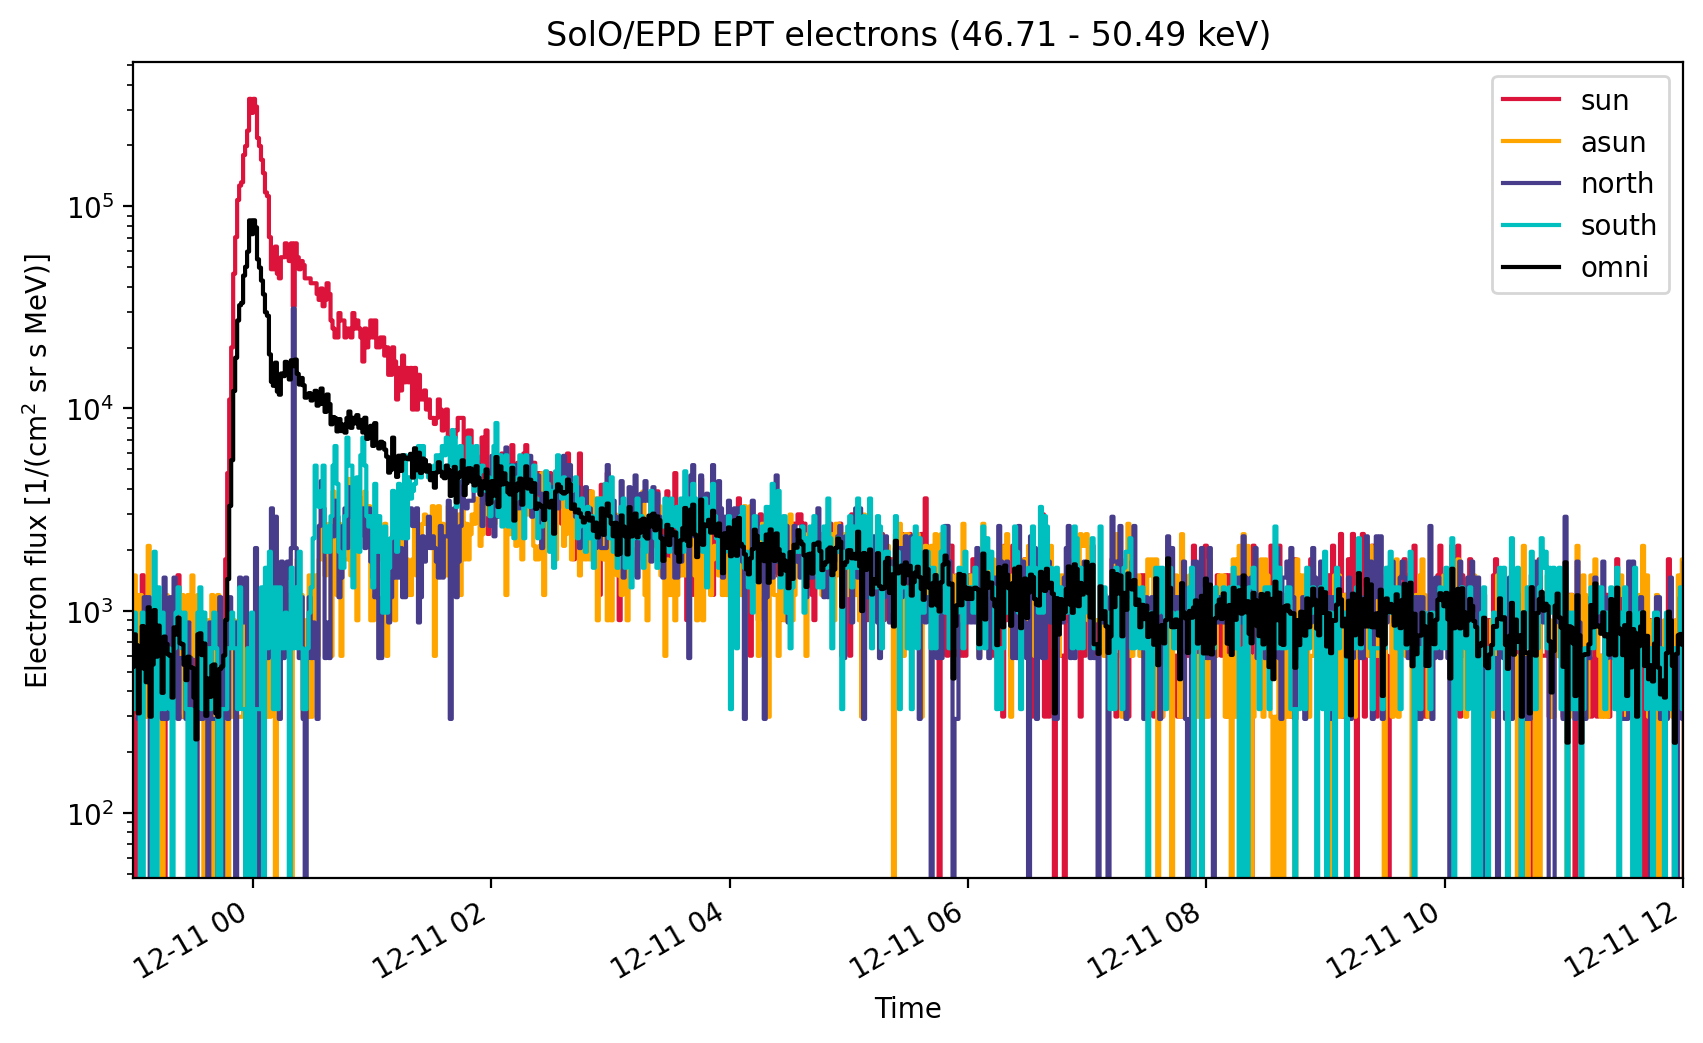

In [ ]:
# energy channel to use; cf. "energies" for the energies
channel = 6

fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
ax = df_electrons_sun['Electron_Flux'][f'Electron_Flux_{channel}'].plot(logy=True, label='sun', 
                                                                        color=color['sun'],
                                                                        drawstyle="steps-mid")
ax = df_electrons_asun['Electron_Flux'][f'Electron_Flux_{channel}'].plot(logy=True, label='asun', 
                                                                        color=color['asun'],
                                                                        drawstyle="steps-mid")
ax = df_electrons_north['Electron_Flux'][f'Electron_Flux_{channel}'].plot(logy=True, label='north', 
                                                                        color=color['north'],
                                                                        drawstyle="steps-mid")
ax = df_electrons_south['Electron_Flux'][f'Electron_Flux_{channel}'].plot(logy=True, label='south', 
                                                                        color=color['south'],
                                                                        drawstyle="steps-mid")
ax = df_electrons_omni['Electron_Flux'][f'Electron_Flux_{channel}'].plot(logy=True, label='omni', 
                                                                        color='black',
                                                                        drawstyle="steps-mid")

ax.set_xlim([dt.datetime(2020, 12, 10, 23, 0), dt.datetime(2020, 12, 11, 12, 0)])

ax.set_ylabel(r"Electron flux [1/(cm$^2$ sr s MeV)]")
ax.set_title(f"SolO/EPD EPT electrons ({1000*energies['Electron_Bins_Low_Energy'][channel]:.2f}"
             + f" - {1000*energies['Electron_Bins_Low_Energy'][channel+1]:.2f} keV)")
ax.legend()

#### Optionally: Save individual datasets as ASCII files<a class="anchor" id="ascii_export"></a>
In case you want to export some of the obtained data as a ASCII file, e.g., to further use it in some other analysis, this is possible on a per-dataset base. The following cell will export the Pandas DataFrame containing the sun-viewing electron measurements of EPT, which has been read in above, to a comma separared ASCII file (csv) in the directory next to this notebook file.

In [ ]:
# Define the full path where to save the csv file. Either just provide the 
# file name that will be saved next to the notebook, or a full path, e.g.
# '/home/user/data/ept_electrons.csv'
full_ascii_path = 'ept_electrons.csv'

# Saving specific Dataframe. Needs to be done for each individual Dataframe!
df_electrons_sun.to_csv(full_ascii_path)

print('File saved to ' + full_ascii_path)

File saved to ept_electrons.csv


If you run this Notebook on the Hub server, you should find the created file [in this directory](https://hub-serpentine.rahtiapp.fi/user-redirect/tree/serpentine/notebooks/sep_analysis_tools). To download it, select it by clicking on the checkbox left to it (selecting multiple files is also possible) and then click on "Download" on the top of the page.

---
### 2. Example with different energy channels for EPT electrons and ions <a class="anchor" id="Solar_Orbiter_EPT"></a>



Define some basic options:

In [ ]:
# define start and end date of data to load (year, month, day):
startdate = dt.datetime(2020, 7, 8)
enddate = dt.datetime(2020, 7, 24)

# change time resolution to get smoother curve
resample = '60min' 

# define viewing direction of telescope (for EPT & HET)
viewing = 'sun'

Obtain the data, downloading them to `path` if needed:

In [ ]:
# load ept sun viewing data
df_protons_ept, df_electrons_ept, energies_ept = epd_load(sensor='ept', level='l2', 
                                                          startdate=startdate, enddate=enddate, 
                                                          viewing=viewing, 
                                                          path=path, autodownload=autodownload)

Get info on energy channels:

In [ ]:
energies_ept

{'Ion_Bins_Text': array([['0.0485 - 0.0548 MeV'],
        ['0.0511 - 0.0580 MeV'],
        ['0.0548 - 0.0602 MeV'],
        ['0.0580 - 0.0637 MeV'],
        ['0.0602 - 0.0674 MeV'],
        ['0.0637 - 0.0695 MeV'],
        ['0.0695 - 0.0735 MeV'],
        ['0.0735 - 0.0775 MeV'],
        ['0.0775 - 0.0812 MeV'],
        ['0.0812 - 0.0862 MeV'],
        ['0.0862 - 0.0909 MeV'],
        ['0.0909 - 0.0967 MeV'],
        ['0.0967 - 0.1023 MeV'],
        ['0.1023 - 0.1090 MeV'],
        ['0.1090 - 0.1164 MeV'],
        ['0.1164 - 0.1240 MeV'],
        ['0.1240 - 0.1324 MeV'],
        ['0.1324 - 0.1419 MeV'],
        ['0.1419 - 0.1513 MeV'],
        ['0.1513 - 0.1627 MeV'],
        ['0.1627 - 0.1741 MeV'],
        ['0.1741 - 0.1875 MeV'],
        ['0.1875 - 0.2029 MeV'],
        ['0.2029 - 0.2183 MeV'],
        ['0.2183 - 0.2357 MeV'],
        ['0.2357 - 0.2541 MeV'],
        ['0.2541 - 0.2746 MeV'],
        ['0.2746 - 0.2981 MeV'],
        ['0.2981 - 0.3215 MeV'],
        ['0.3215 - 0.3491 

Make the plot:

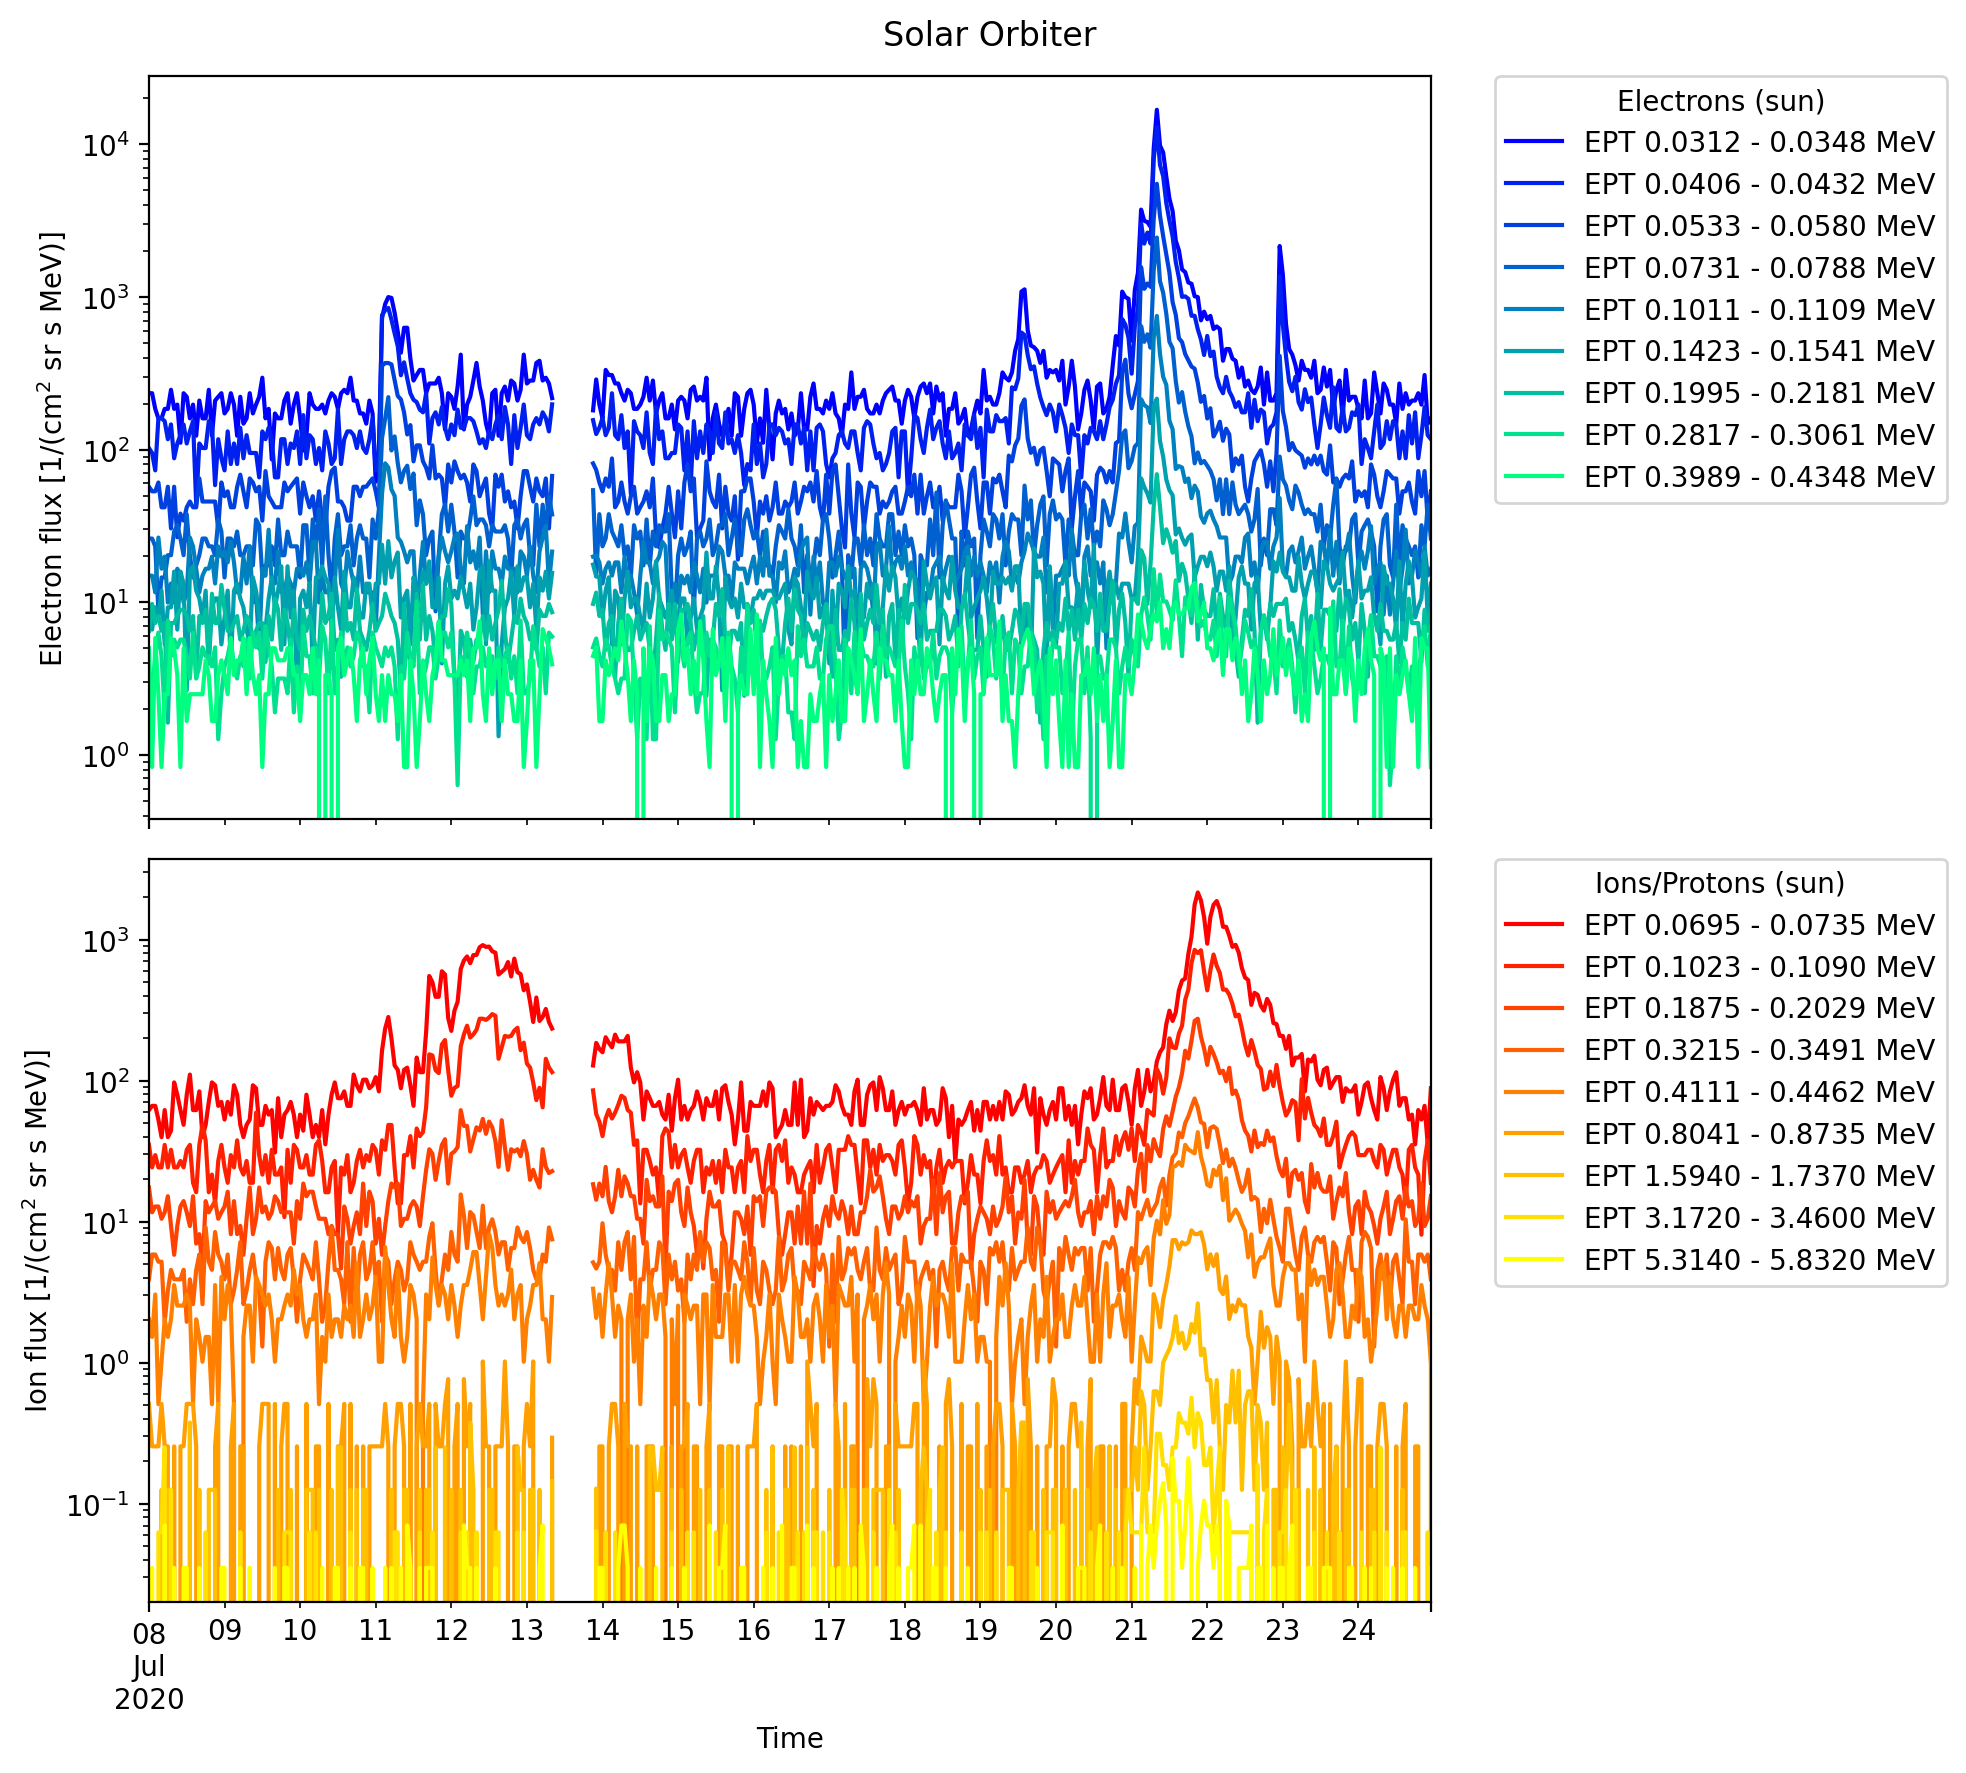

In [ ]:
fig, axs = plt.subplots(2, sharex=True, figsize=(10, 9), dpi=200)

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,9)), i.e. in 9 parts
axs[0].set_prop_cycle('color', plt.cm.winter(np.linspace(0,1,9)))
# plot selection of ept electron channels
for channel in [0, 4, 8, 12, 16, 20, 24, 28, 32]:
    df_electrons_ept['Electron_Flux'][f'Electron_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[0], logy=True, label='EPT '+energies_ept["Electron_Bins_Text"][channel][0])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,9)), i.e. in 9 parts
axs[1].set_prop_cycle('color', plt.cm.autumn(np.linspace(0,1,9)))
# plot selection of ept ion channels
for channel in [6, 13, 22, 29, 32, 40, 48, 56, 62]:
    df_protons_ept['Ion_Flux'][f'Ion_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[1], logy=True, label='EPT '+energies_ept["Ion_Bins_Text"][channel][0])

axs[0].set_ylabel(r"Electron flux [1/(cm$^2$ sr s MeV)]")
axs[1].set_ylabel(r"Ion flux [1/(cm$^2$ sr s MeV)]")
axs[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=f'Electrons ({viewing})')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=f'Ions/Protons ({viewing})')
fig.suptitle('Solar Orbiter')
plt.subplots_adjust(hspace=0)
plt.tight_layout()

---
### 3. Example with EPT and HET data <a class="anchor" id="Solar_Orbiter_EPT_HET"></a>



Define some basic options:

In [ ]:
# define start and end date of data to load (year, month, day):
startdate = dt.datetime(2021, 10, 28)
enddate = dt.datetime(2021, 10, 29)

# change time resolution to get smoother curve
resample = '10min' 

# define viewing direction of telescope (for EPT & HET)
viewing = 'sun'

Obtain the data, downloading them to `path` if needed:

In [ ]:
# load ept sun viewing data
df_protons_ept, df_electrons_ept, energies_ept = epd_load(sensor='ept', level='l2', 
                                                          startdate=startdate, enddate=enddate, 
                                                          viewing=viewing, 
                                                          path=path, autodownload=autodownload)

# load het sun viewing data
df_protons_het, df_electrons_het, energies_het = epd_load(sensor='het', level='l2', 
                                                          startdate=startdate, enddate=enddate, 
                                                          viewing=viewing, 
                                                          path=path, autodownload=autodownload)

Make plot:

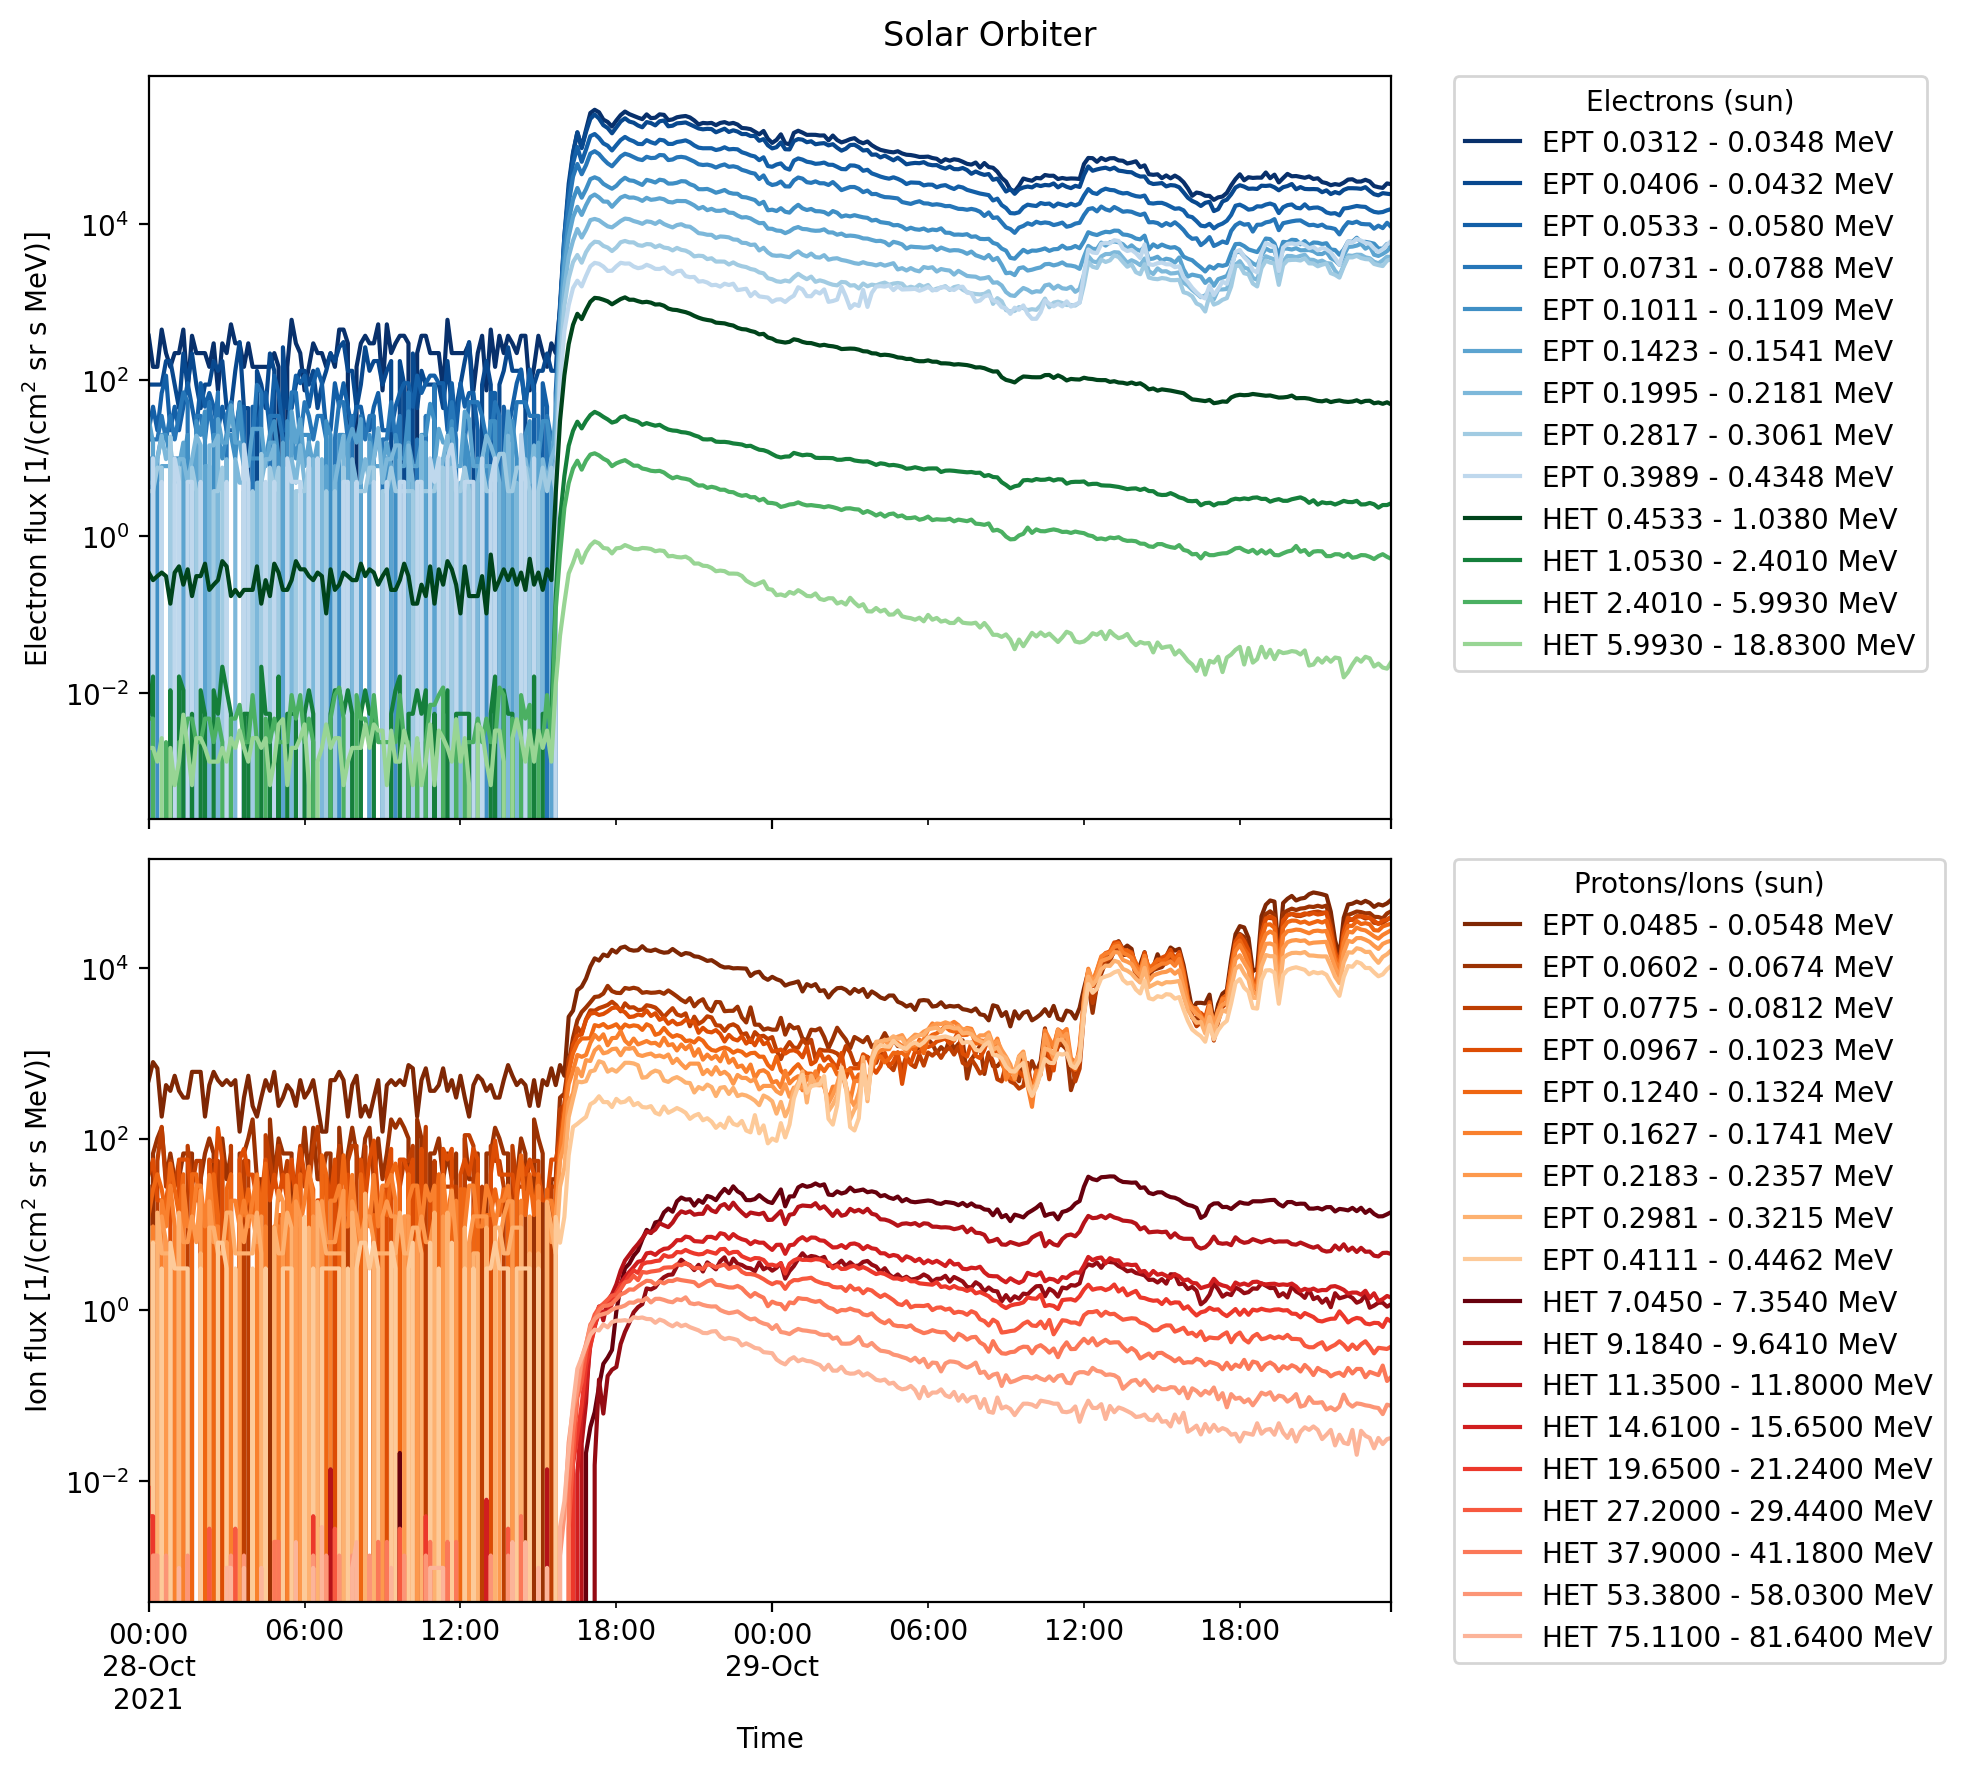

In [ ]:
fig, axs = plt.subplots(2, sharex=True, figsize=(10, 9), dpi=200)


# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,12)), i.e. in 12 parts
axs[0].set_prop_cycle('color', plt.cm.Blues_r(np.linspace(0,1,12)))
# plot selection of ept electron channels
for channel in [0, 4, 8, 12, 16, 20, 24, 28, 32]:
    df_electrons_ept['Electron_Flux'][f'Electron_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[0], logy=True, label='EPT '+energies_ept["Electron_Bins_Text"][channel][0])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,6)), i.e. in 6 parts
axs[0].set_prop_cycle('color', plt.cm.Greens_r(np.linspace(0,1,6)))
# plot selection of het electron channels
for channel in [0, 1, 2, 3]:
    df_electrons_het['Electron_Flux'][f'Electron_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[0], logy=True, label='HET '+energies_het["Electron_Bins_Text"][channel][0])


# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,12)), i.e. in 12 parts
axs[1].set_prop_cycle('color', plt.cm.Oranges_r(np.linspace(0,1,12)))
# plot selection of ept ion channels
for channel in [0, 4, 8, 12, 16, 20, 24, 28, 32]:
    df_protons_ept['Ion_Flux'][f'Ion_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[1], logy=True, label='EPT '+energies_ept["Ion_Bins_Text"][channel][0])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,12)), i.e. in 12 parts
axs[1].set_prop_cycle('color', plt.cm.Reds_r(np.linspace(0,1,12)))
# plot selection of het ion channels
for channel in [0, 4, 8, 12, 16, 20, 24, 28, 32]:
    df_protons_het['H_Flux'][f'H_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[1], logy=True, label='HET '+energies_het["H_Bins_Text"][channel][0])

axs[0].set_ylabel(r"Electron flux [1/(cm$^2$ sr s MeV)]")
axs[1].set_ylabel(r"Ion flux [1/(cm$^2$ sr s MeV)]")
axs[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=f'Electrons ({viewing})')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=f'Protons/Ions ({viewing})')
fig.suptitle('Solar Orbiter')
plt.subplots_adjust(hspace=0)
plt.tight_layout()

---
### 4. Example with EPT and STEP data <a class="anchor" id="Solar_Orbiter_EPT_STEP"></a>

##### Note that for STEP the data product changed in Oct 2021, and with that also the energy channels!

Define some basic options:

In [ ]:
# define start and end date of data to load (year, month, day):
startdate = dt.datetime(2020, 7, 8)
enddate = dt.datetime(2020, 7, 24)

# change time resolution to get smoother curve
resample = '60min' 

# define viewing direction of telescope (for EPT & HET)
viewing = 'sun'

Obtain the data, downloading them to `path` if needed:

In [ ]:
# load ept sun viewing data
df_protons_ept, df_electrons_ept, energies_ept = epd_load(sensor='ept', level='l2', 
                                                          startdate=startdate, enddate=enddate, 
                                                          viewing=viewing, 
                                                          path=path, autodownload=autodownload)

# load step data
df_step, energies_step = epd_load(sensor='step', level='l2', 
                                  startdate=startdate, enddate=enddate,
                                  path=path, autodownload=autodownload)

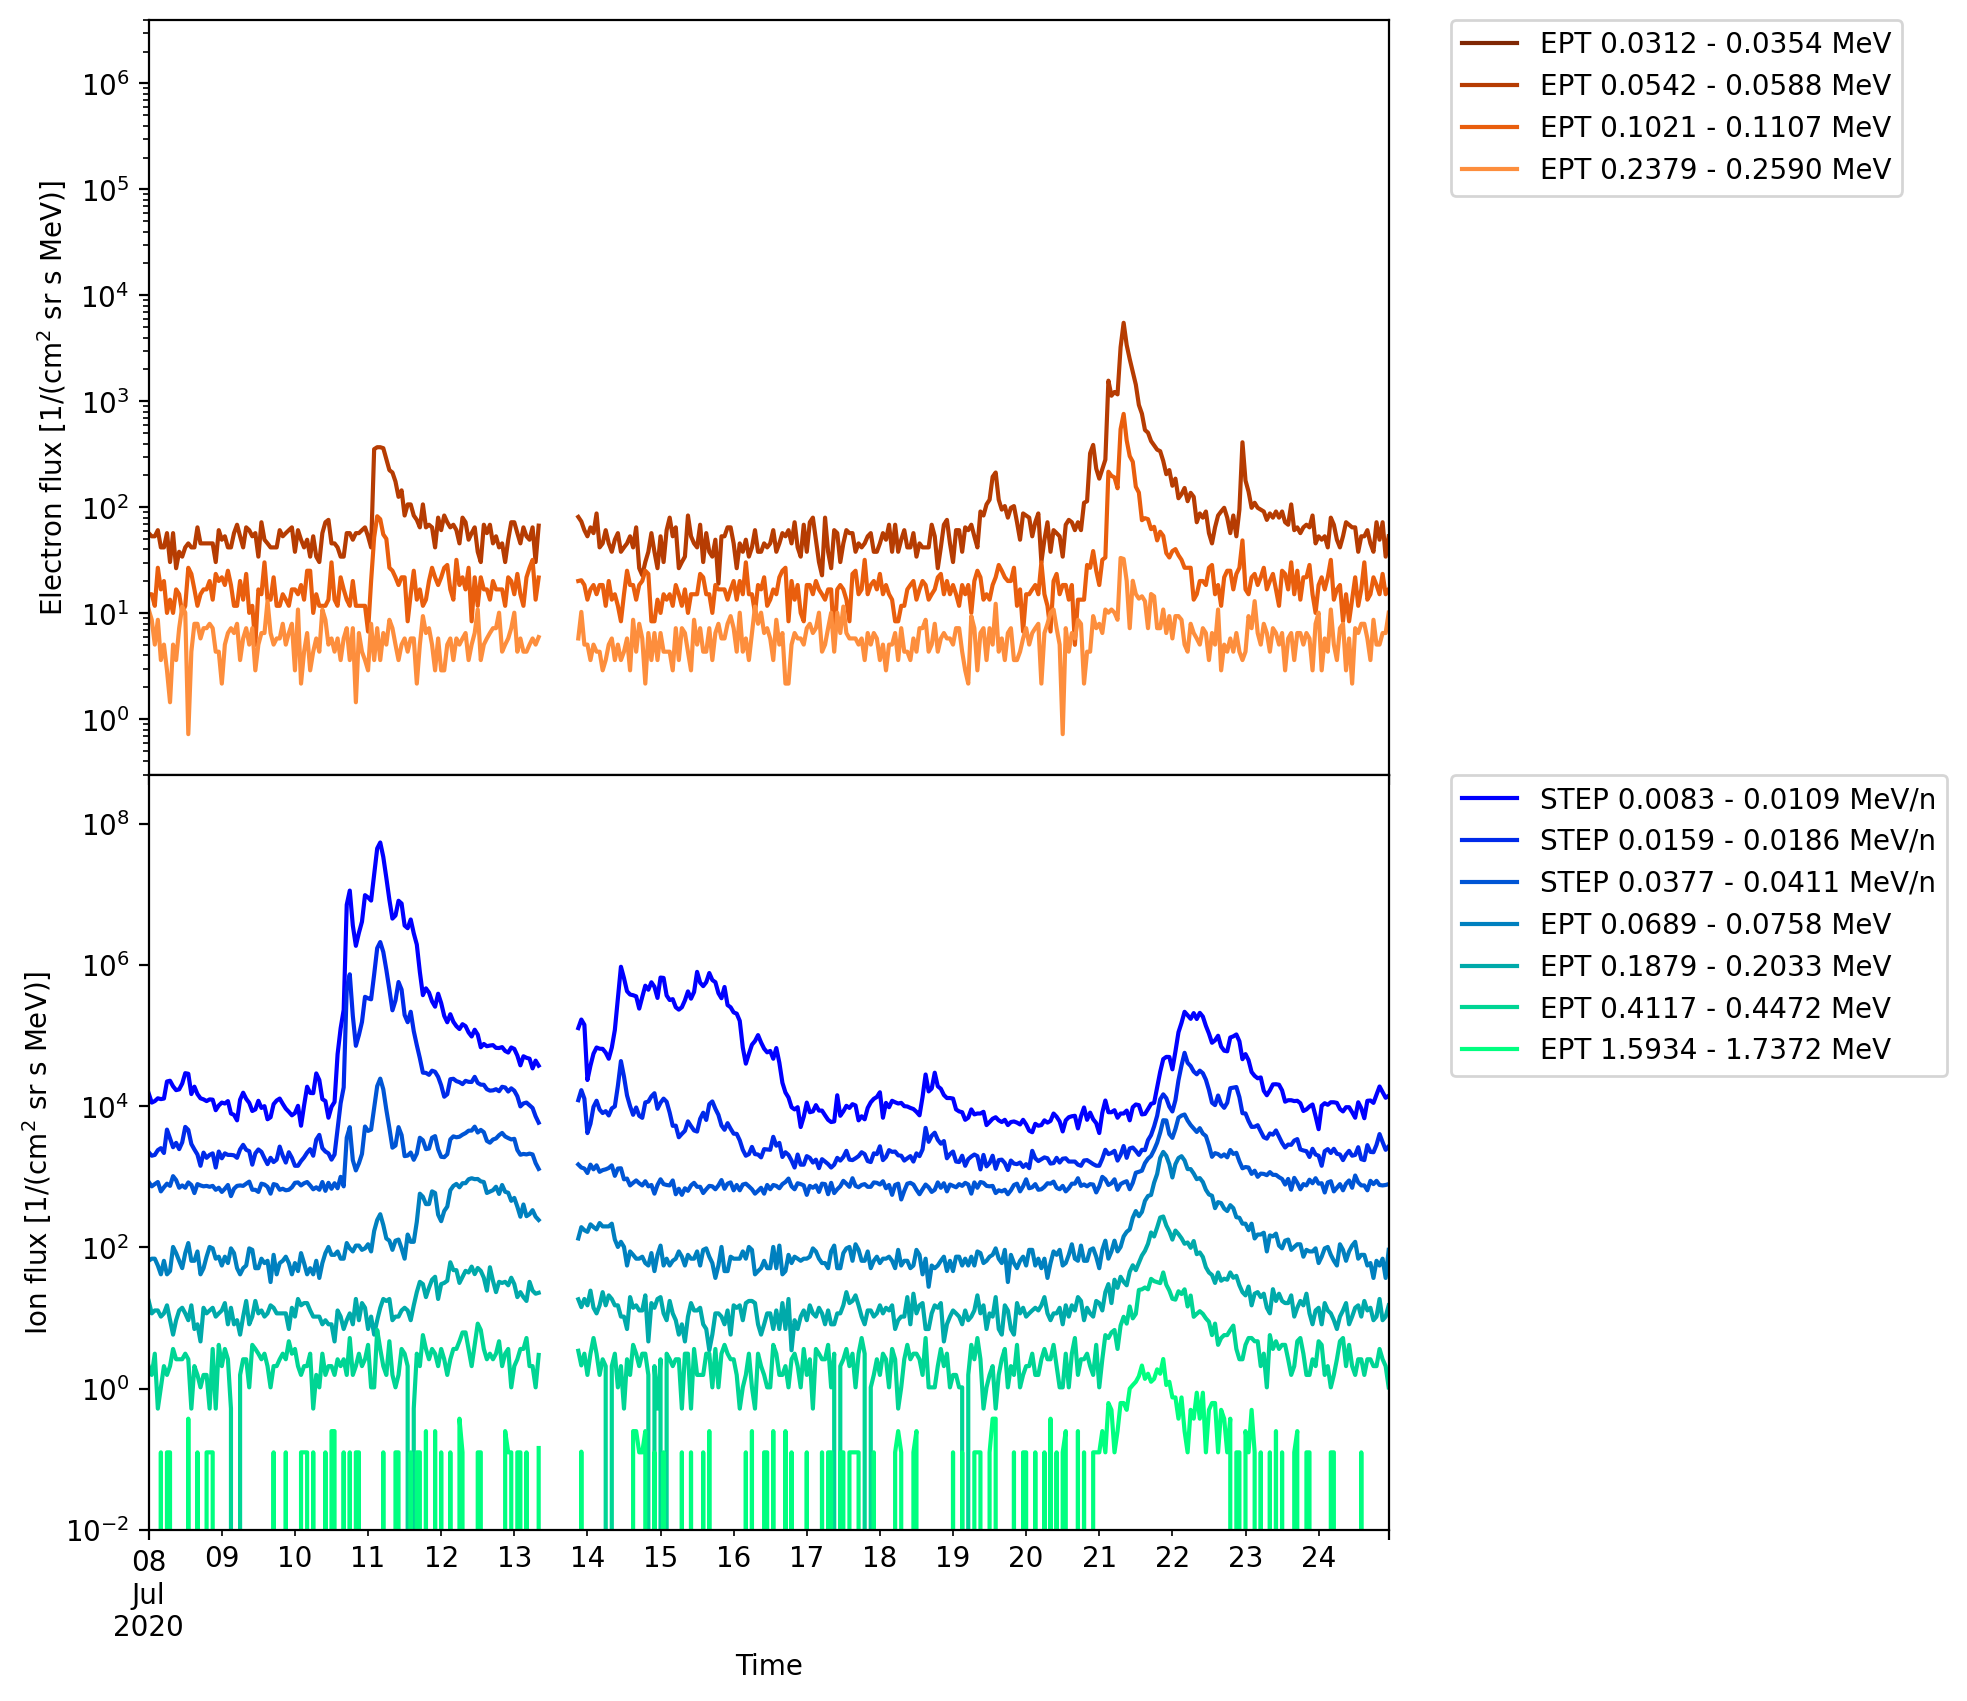

In [ ]:
fig, axs = plt.subplots(2, sharex=True, figsize=(8, 10), dpi=200)
axs[0].set_prop_cycle('color', plt.cm.Oranges_r(np.linspace(0,1,7)))
axs[1].set_prop_cycle('color', plt.cm.winter(np.linspace(0,1,7)))

# plot selection of ept electron channels
for channel in [0, 8, 16, 26]:
    df_electrons_ept['Electron_Flux'][f'Electron_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[0], logy=True, label='EPT '+energies_ept["Electron_Bins_Text"][channel][0])

# plot selection of step ion channels
for channel in [8, 17, 33]:
    df_step['Magnet_Avg_Flux_'+str(channel)].resample(resample).mean().plot(
      ax = axs[1], logy=True, label='STEP '+energies_step["Bins_Text"][channel][0])

# plot selection of ept ion channels
for channel in [6, 22, 32, 48]:
    df_protons_ept['Ion_Flux'][f'Ion_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[1], logy=True, label='EPT '+energies_ept["Ion_Bins_Text"][channel][0])

axs[0].set_ylim([0.3, 4e6])
axs[1].set_ylim([0.01, 5e8])

axs[0].set_ylabel(r"Electron flux [1/(cm$^2$ sr s MeV)]")
axs[1].set_ylabel(r"Ion flux [1/(cm$^2$ sr s MeV)]")
axs[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplots_adjust(hspace=0)

---
### 5. Example using low latency data <a class="anchor" id="Solar_Orbiter_LL"></a>



Low latency data available from SOAR provides access to the latest observations, but is not verified and should thus not be used for final analysis like publications! 

Be also aware that some of the keys (i.e., column names) of the returned DataFrames are different for level 2 and low latency data, so you need e.g. to adjust the code for plotting the data a bit.

Let's redo [Example 3 with EPT and HET data](#Solar_Orbiter_EPT_HET), using now low latency data of a very recent event.

Define some basic options:

In [ ]:
# define start and end date of data to load (year, month, day):
startdate = dt.datetime(2022, 9, 5)
enddate = dt.datetime(2022, 9, 7)

# change time resolution to get smoother curve
resample = '10min' 

# define viewing direction of telescope (for EPT & HET)
viewing = 'sun'

Obtain the data, downloading them to `path` if needed. Note that we set `level` here to `'ll'`!

In [ ]:
# load ept sun viewing data
df_protons_ept, df_electrons_ept, energies_ept = epd_load(sensor='ept', level='ll', 
                                                          startdate=startdate, enddate=enddate, 
                                                          viewing=viewing, 
                                                          path=path, autodownload=autodownload)

# load het sun viewing data
df_protons_het, df_electrons_het, energies_het = epd_load(sensor='het', level='ll', 
                                                          startdate=startdate, enddate=enddate, 
                                                          viewing=viewing, 
                                                          path=path, autodownload=autodownload)

Make plot. Note that compared to the previous example some keys have changed!

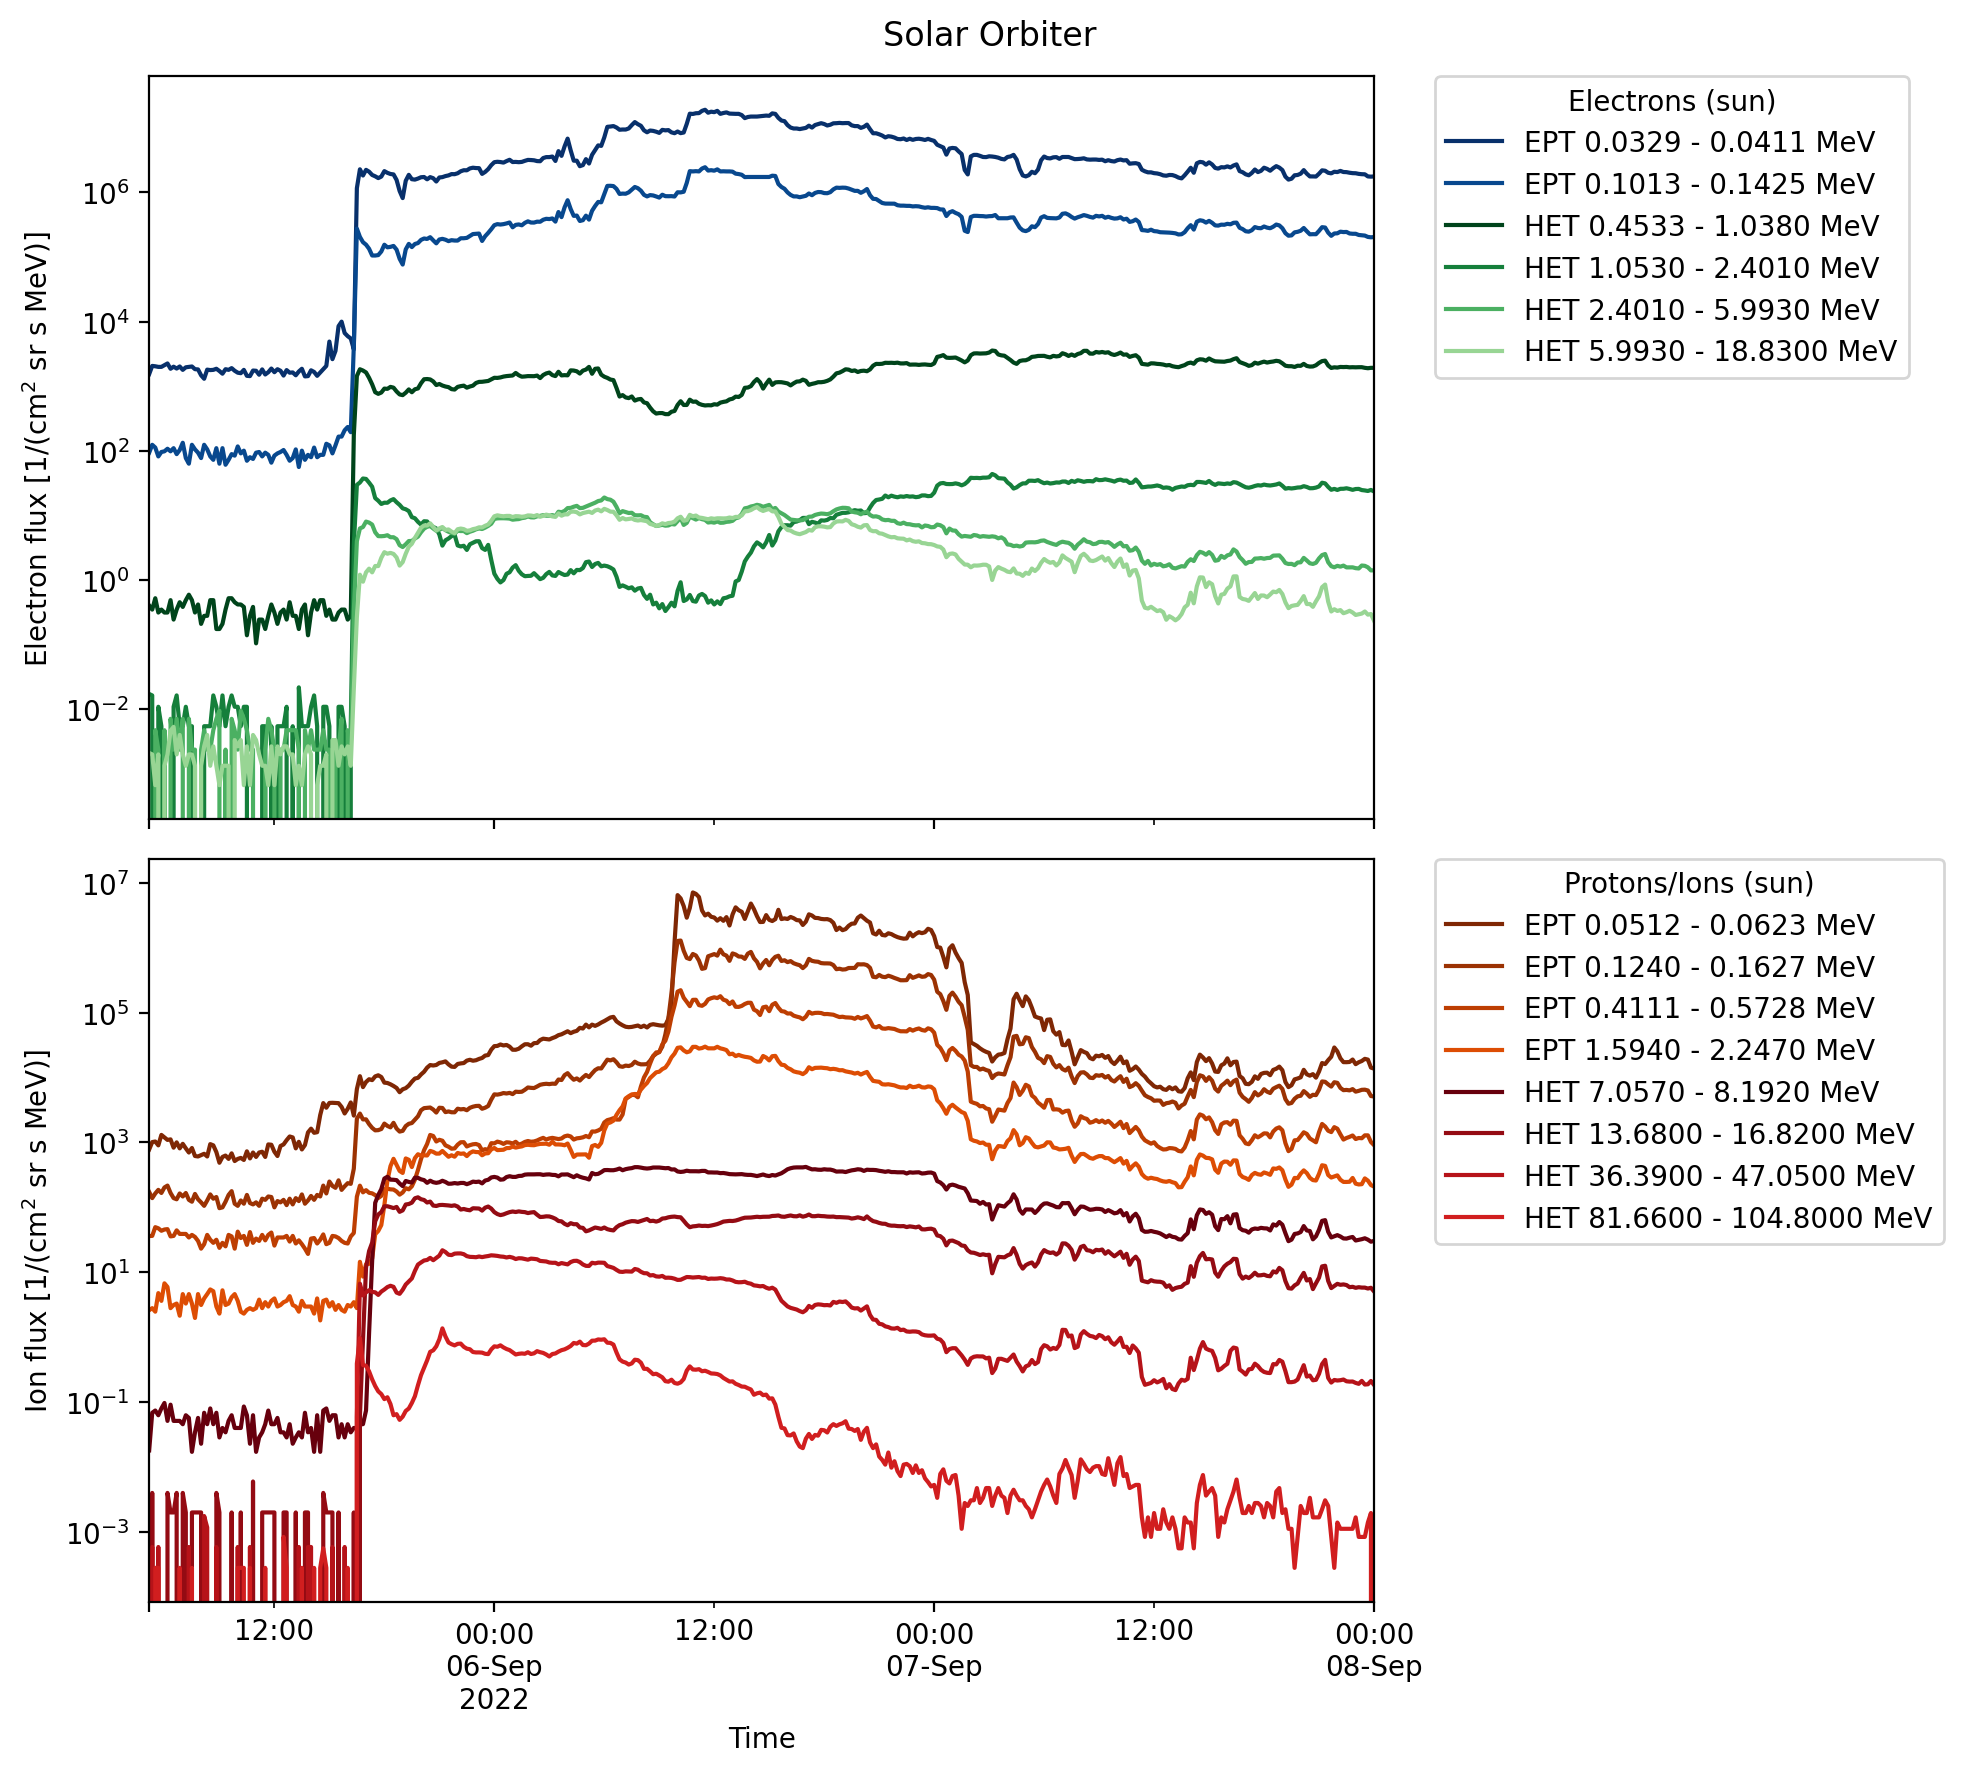

In [ ]:
fig, axs = plt.subplots(2, sharex=True, figsize=(10, 9), dpi=200)


# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,12)), i.e. in 12 parts
axs[0].set_prop_cycle('color', plt.cm.Blues_r(np.linspace(0,1,12)))
# plot selection of ept electron channels
for channel in [0, 4]:
    df_electrons_ept['Electron_Flux'][f'Ele_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[0], logy=True, label='EPT '+energies_ept["Ele_Bins_Text"][channel][0])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,6)), i.e. in 6 parts
axs[0].set_prop_cycle('color', plt.cm.Greens_r(np.linspace(0,1,6)))
# plot selection of het electron channels
for channel in [0, 1, 2, 3]:
    df_electrons_het['Electron_Flux'][f'Ele_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[0], logy=True, label='HET '+energies_het["Ele_Bins_Text"][channel][0])


# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,12)), i.e. in 12 parts
axs[1].set_prop_cycle('color', plt.cm.Oranges_r(np.linspace(0,1,12)))
# plot selection of ept ion channels
for channel in [0, 4, 8, 12]:
    df_protons_ept['Ion_Flux'][f'Prot_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[1], logy=True, label='EPT '+energies_ept["Prot_Bins_Text"][channel][0])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,12)), i.e. in 12 parts
axs[1].set_prop_cycle('color', plt.cm.Reds_r(np.linspace(0,1,12)))
# plot selection of het ion channels
for channel in [0, 4, 8, 11]:
    df_protons_het['H_Flux'][f'H_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[1], logy=True, label='HET '+energies_het["H_Bins_Text"][channel][0])

axs[0].set_ylabel(r"Electron flux [1/(cm$^2$ sr s MeV)]")
axs[1].set_ylabel(r"Ion flux [1/(cm$^2$ sr s MeV)]")
axs[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=f'Electrons ({viewing})')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=f'Protons/Ions ({viewing})')
fig.suptitle('Solar Orbiter')
plt.subplots_adjust(hspace=0)
plt.tight_layout()

---
# Solar Orbiter/MAG <a class="anchor" id="solo-mag-loader"></a>

Python data loader for Solar Orbiter's (SolO) MAG instrument. Provides level 2 and low-latency data obtained by SunPy through CDF files from CDAWeb.

- GitHub: https://github.com/serpentine-h2020/SEPpy
- MAG user & data guides: https://issues.cosmos.esa.int/solarorbiterwiki/display/SOSP/Archive+Support+Data#ArchiveSupportData-MAGInstrument

#### Imports

In [ ]:
from seppy.loader.solo import mag_load
from seppy.util import jupyterhub_data_path
import datetime as dt
from matplotlib import pyplot as plt
import os

#### Input options

-  ``startdate``, ``enddate``: Datetime object (e.g., dt.date(2021,12,31) or dt.datetime(2021,4,15)), "standard"  datetime string (e.g., '2021/04/15') or integer of the form yyyymmdd with empty positions filled with zeros, e.g. '20210415' (enddate must be later than startdate)
-  ``level``: ``'l2'`` or ``'ll'`` (string). Defines level of data product: level 2 ('l2') or low-latency ('ll'). By default 'l2'
-  ``data_type``: ``'normal'``, ``'normal-1-minute'``, or ``'burst'`` (string), optional. By default 'normal'.
    - ``'normal'``: 8 measurements per second
    - ``'normal-1-minute'``: 0.016667 measurements per second (1 per minute)
    - ``'burst'``: 64 measurements per second
-  ``frame``: ``'rtn'``, ``'srf'``, or ``'vso'`` (string), optional. Coordinate frame of MAG data. By default 'rtn'. ('vso' not supported at the moment.)
-  ``path``: String, optional. Path for storing downloaded data, e.g. ``path='data/solo/mag/'``. By default `None`. Default setting saves data according to [sunpy's Fido standards](https://docs.sunpy.org/en/stable/guide/acquiring_data/fido.html#downloading-data).

In [ ]:
startdate = 20210711
enddate = dt.date(2021,7,12)  # alternative input method for the date
level = 'l2'
data_type = 'normal-1-minute'
frame = 'rtn' 

# set your local path where you want to save the data files (os.getcwd() just is the current working dir):
path = f"{os.getcwd()}/data/"

# load the data into a Pandas DataFrame
df = mag_load(startdate=startdate, enddate=enddate, level=level, data_type=data_type, frame=frame, path=path)

In [ ]:
display(df)

B_RTN_0   B_RTN_1   B_RTN_2  QUALITY_BITMASK  \
EPOCH                                                                       
2021-07-11 00:00:29.999998 -0.933680  1.768297  2.240541              128   
2021-07-11 00:01:30.000004 -0.842777  1.583771  2.354151              128   
2021-07-11 00:02:30.000001 -0.705639  1.581371  2.474001              128   
2021-07-11 00:03:29.999997 -0.480510  1.845860  2.363585              132   
2021-07-11 00:04:30.000004 -0.700601  1.770105  2.426208              132   
...                              ...       ...       ...              ...   
2021-07-11 23:55:29.999995  0.781945  1.024335  0.210010              148   
2021-07-11 23:56:30.000002  0.850668  0.926436  0.132452              144   
2021-07-11 23:57:29.999998  1.100774  1.251076  0.118467              144   
2021-07-11 23:58:29.999995  0.552056  1.728143 -0.525681              128   
2021-07-11 23:59:30.000001  0.690260  1.496668 -0.058404              128   

                            QUALITY_FLAG  VECTOR_RANGE  VECTOR_TIME_RESOLUTION  
EPOCH                                                                           
2021-07-11 00:00:29.999998             3             3                0.016667  
2021-07-11 00:01:30.000004             3             3                0.016667  
2021-07-11 00:02:30.000001             3             3                0.016667  
2021-07-11 00:03:29.999997             3             3                0.016667  
2021-07-11 00:04:30.000004             3             3                0.016667  
...                                  ...           ...                     ...  
2021-07-11 23:55:29.999995             2             3                0.016667  
2021-07-11 23:56:30.000002             2             3                0.016667  
2021-07-11 23:57:29.999998             2             3                0.016667  
2021-07-11 23:58:29.999995             3             3                0.016667  
2021-07-11 23:59:30.000001             3             3                0.016667  

[1440 rows x 7 columns]

<AxesSubplot: xlabel='Time', ylabel='B [nT]'>

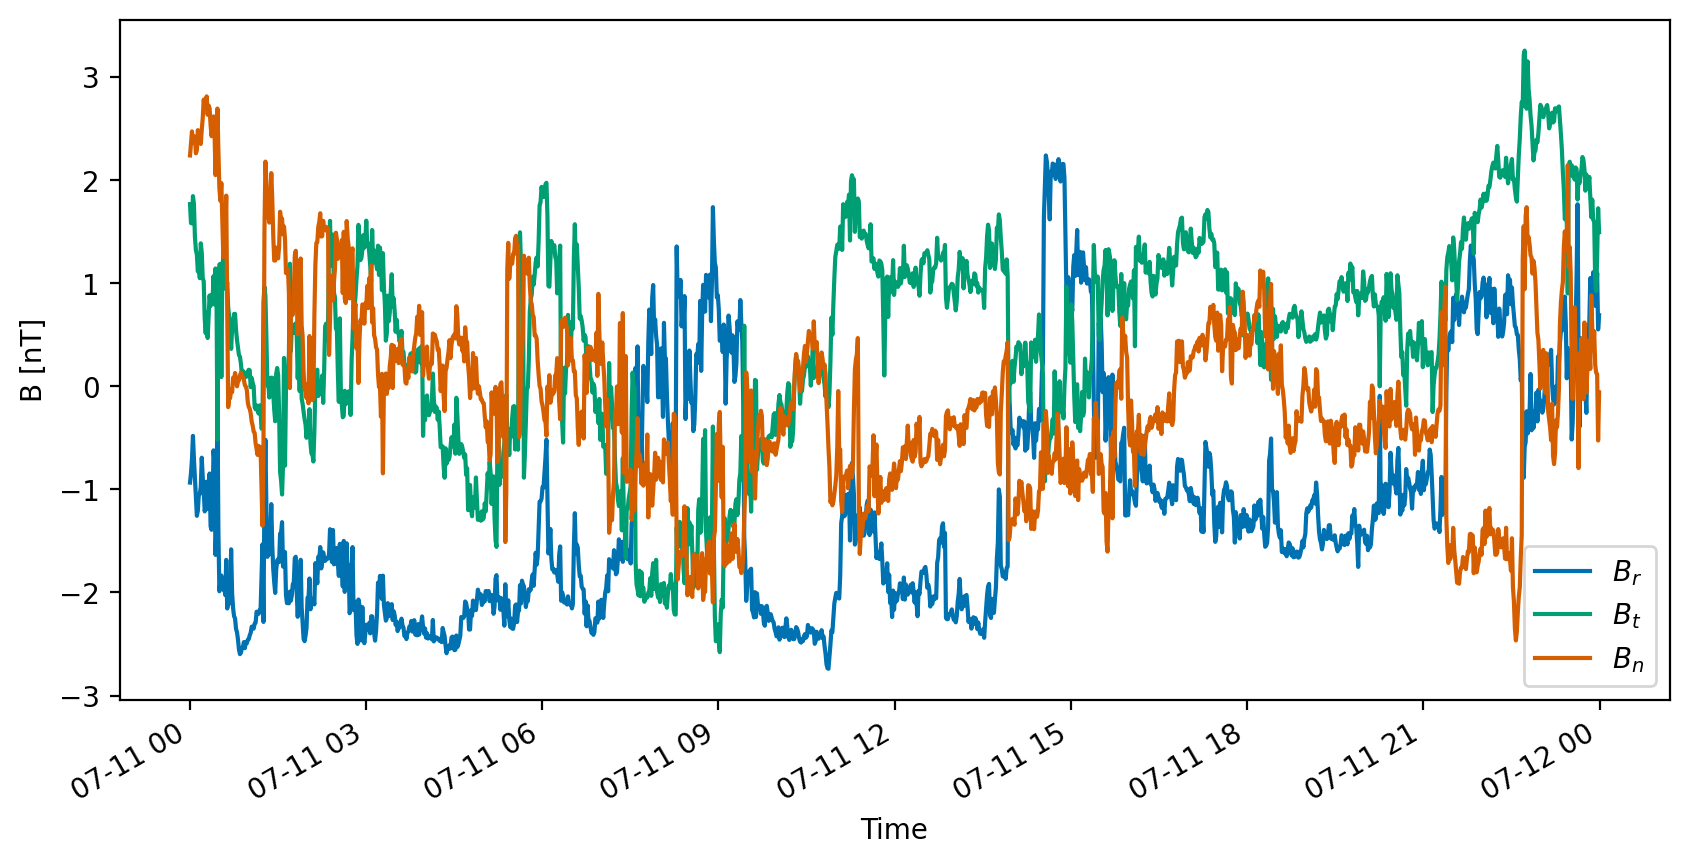

In [ ]:
fig = plt.figure(dpi=200)
df.plot(y=['B_RTN_0', 'B_RTN_1', 'B_RTN_2'], 
        label=[r'$B_r$', r'$B_t$', r'$B_n$'], 
        xlabel='Time', ylabel='B [nT]',
        figsize=(10,5), ax = plt.gca())

#### Optionally: Save individual datasets as ASCII files<a class="anchor" id="ascii_export"></a>
In case you want to export some of the obtained data as a ASCII file, e.g., to further use it in some other analysis, this is possible on a per-dataset base. The following cell will export the Pandas DataFrame containing the measurements of Solar Orbiter MAG, which has been read in above, to a comma separared ASCII file (csv) in the directory next to this notebook file.

In [ ]:
# Define the full path where to save the csv file. Either just provide the 
# file name that will be saved next to the notebook, or a full path, e.g.
# '/home/user/data/ept_electrons.csv'
full_ascii_path = 'solo_mag.csv'

# Saving specific Dataframe. Needs to be done for each individual Dataframe!
df.to_csv(full_ascii_path)

print('File saved to ' + full_ascii_path)

File saved to solo_mag.csv


If you run this Notebook on the Hub server, you should find the created file [in this directory](https://hub-serpentine.rahtiapp.fi/user-redirect/tree/serpentine/notebooks/sep_analysis_tools). To download it, select it by clicking on the checkbox left to it (selecting multiple files is also possible) and then click on "Download" on the top of the page.

---
# Parker Solar Probe/ISOIS <a class="anchor" id="psp-isois-loader"></a>

- GitHub: https://github.com/serpentine-h2020/SEPpy

Python data loader for PSP/ISOIS instrument. At the moment provides released data obtained by SunPy through CDF files from CDAWeb for the following datasets:

- `PSP_ISOIS-EPIHI_L2-HET-RATES60`: Parker Solar Probe ISOIS EPI-Hi Level 2 HET 1-minute Rates ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesP.html#PSP_ISOIS-EPIHI_L2-HET-RATES60), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/psp_isois-epihi_l2-het-rates60_00000000_v01.skt))
- `PSP_ISOIS-EPIHI_L2-HET-RATES3600`: Parker Solar Probe ISOIS EPI-Hi Level 2 HET Hourly Rates ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesP.html#PSP_ISOIS-EPIHI_L2-HET-RATES3600), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/psp_isois-epihi_l2-het-rates3600_00000000_v01.skt)) (higher coverage than 'RATES60' before mid-2021)
- `PSP_ISOIS-EPILO_L2-IC`: Parker Solar Probe ISOIS EPI-Lo Level 2 Ion Composition mode ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesP.html#PSP_ISOIS-EPILO_L2-IC), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/psp_isois-epilo_l2-ic_00000000_v01.skt))
- `PSP_ISOIS-EPILO_L2-PE`: Parker Solar Probe ISOIS EPI-Lo Level 2 Particle Energy mode ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesP.html#PSP_ISOIS-EPILO_L2-PE), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/psp_isois-epilo_l2-pe_00000000_v01.skt))

Current caveats

- A lot of PSP/ISOIS datasets are not supported at the moment, for example:
 - PSP_ISOIS-EPIHI_L2-LET1-RATES60
 - PSP_ISOIS-EPIHI_L2-LET2-RATES60
- For EPIHI, energy values are only loaded from the first day of the interval! (For EPILO, energy values are the mean of the whole loaded interval.)
- EPILO energy tables changed on June 14, 2021.
- Some parts of the data files are skipped for performance reasons.
- Some multi-dimensional parts of the data files are skipped (user warning is provided in this cases).

#### Imports

In [ ]:
from seppy.loader.psp import psp_isois_load
from seppy.util import jupyterhub_data_path
import datetime as dt

#### Define options


-  ``dataset``: (see above for explanation)
 - ``'PSP_ISOIS-EPIHI_L2-HET-RATES60'``
 - ``'PSP_ISOIS-EPIHI_L2-HET-RATES3600'`` (higher coverage than ``'RATES60'`` before mid-2021)
 - ``'PSP_ISOIS-EPILO_L2-IC'``
 - ``'PSP_ISOIS-EPILO_L2-PE'``
-  ``startdate``, ``enddate``: datetime object or "standard" datetime string
-  ``resample``: Pandas frequency (e.g., ``'1min'`` or ``'1h'``), or ``None``, optional. Frequency to which the original data (~24 seconds) is resamepled. By default ``'1min'``.
-  ``path``: String, optional. Local path for storing downloaded data, e.g. ``path='data/psp/isois/'``. By default `None`. Default setting saves data according to [sunpy's Fido standards](https://docs.sunpy.org/en/stable/guide/acquiring_data/fido.html#downloading-data).
-  ``epilo_channel``: String, optional. Only used for EPILO data. Channel of EPILO: 'E', 'F', 'G' (for 'EPILO PE'), or 'C', 'D', 'P', 'R', 'T' (for 'EPILO IC'). By default 'F'.
-  ``epilo_threshold``: Integer or float, optional. Only used for EPILO PE data. Replace all flux/countrate values in ``df`` above ``epilo_threshold`` with ``np.nan``, by default ``None``.
- ``all_columns`` : ``True`` or ``False`` (boolean), optional. Whether to return all columns of the datafile for EPILO (or skip usually unneeded columns for better performance), by default `False`.

In [ ]:
dataset = "PSP_ISOIS-EPIHI_L2-HET-RATES60"
startdate = dt.datetime(2021, 10, 28)
enddate = "2021/10/30"
path = None
resample = "1min"

#### Load data

In [ ]:
df, meta = psp_isois_load(dataset=dataset, startdate=startdate, enddate=enddate,
                          path=path, resample=resample)

In [ ]:
df

A_Electrons_0  A_Electrons_1  A_Electrons_2  \
Epoch                                                              
2021-10-28 07:54:30            2.0            0.0            0.0   
2021-10-28 07:55:30            1.0            0.0            0.0   
2021-10-28 07:56:30            0.0            1.0            0.0   
2021-10-28 07:57:30            0.0            0.0            0.0   
2021-10-28 07:58:30            0.0            0.0            1.0   
...                            ...            ...            ...   
2021-10-29 23:55:30            7.0           36.0          104.0   
2021-10-29 23:56:30            7.0           34.0           88.0   
2021-10-29 23:57:30            2.0           40.0           71.0   
2021-10-29 23:58:30            9.0           46.0          108.0   
2021-10-29 23:59:30            7.0           36.0          116.0   

                     A_Electrons_3  A_Electrons_4  A_Electrons_5  \
Epoch                                                              
2021-10-28 07:54:30            0.0            0.0            0.0   
2021-10-28 07:55:30            0.0            0.0            0.0   
2021-10-28 07:56:30            0.0            1.0            0.0   
2021-10-28 07:57:30            0.0            0.0            0.0   
2021-10-28 07:58:30            0.0            0.0            0.0   
...                            ...            ...            ...   
2021-10-29 23:55:30          134.0          186.0          104.0   
2021-10-29 23:56:30           99.0          171.0           95.0   
2021-10-29 23:57:30          129.0          149.0          115.0   
2021-10-29 23:58:30          138.0          153.0          113.0   
2021-10-29 23:59:30          145.0          133.0           95.0   

                     A_Electrons_6  A_Electrons_7  A_Electrons_8  \
Epoch                                                              
2021-10-28 07:54:30            0.0            0.0            0.0   
2021-10-28 07:55:30            0.0            0.0            0.0   
2021-10-28 07:56:30            0.0            0.0            0.0   
2021-10-28 07:57:30            0.0            0.0            0.0   
2021-10-28 07:58:30            0.0            0.0            0.0   
...                            ...            ...            ...   
2021-10-29 23:55:30           95.0           61.0           30.0   
2021-10-29 23:56:30           86.0           37.0           36.0   
2021-10-29 23:57:30           79.0           46.0           29.0   
2021-10-29 23:58:30           67.0           49.0           37.0   
2021-10-29 23:59:30           99.0           43.0           24.0   

                     A_Electrons_9  ...  B_H_Uncertainty_5  B_H_Uncertainty_6  \
Epoch                               ...                                         
2021-10-28 07:54:30            0.0  ...           0.000000           0.000000   
2021-10-28 07:55:30            0.0  ...           0.000000           0.000000   
2021-10-28 07:56:30            0.0  ...           0.000000           0.000000   
2021-10-28 07:57:30            0.0  ...           0.000000           0.000000   
2021-10-28 07:58:30            0.0  ...           0.000000           0.000000   
...                            ...  ...                ...                ...   
2021-10-29 23:55:30           15.0  ...           0.141131           0.129024   
2021-10-29 23:56:30           14.0  ...           0.152219           0.136818   
2021-10-29 23:57:30           19.0  ...           0.158609           0.122433   
2021-10-29 23:58:30           15.0  ...           0.153152           0.123542   
2021-10-29 23:59:30           21.0  ...           0.149621           0.123572   

                     B_H_Uncertainty_7  B_H_Uncertainty_8  B_H_Uncertainty_9  \
Epoch                                                                          
2021-10-28 07:54:30           0.000000           0.000000           0.000000   
2021-10-28 07:55:30           0.000000           0.000000           0.00

In [ ]:
meta

{'H_ENERGY': array([ 7.3360386,  8.72407  , 10.374725 , 12.337697 , 14.672077 ,
        17.44814  , 20.74945  , 24.675394 , 29.344154 , 34.89628  ,
        41.4989   , 49.35079  , 58.68831  , 69.79256  , 82.9978   ],
       dtype=float32),
 'H_ENERGY_DELTAPLUS': array([0.66396827, 0.7895957 , 0.93899286, 1.116657  , 1.3279365 ,
        1.5791914 , 1.8779857 , 2.233314  , 2.655873  , 3.158383  ,
        3.7559714 , 4.466628  , 5.311746  , 6.316766  , 7.511943  ],
       dtype=float32),
 'H_ENERGY_DELTAMINUS': array([0.60886157, 0.7240625 , 0.86106026, 1.023979  , 1.2177231 ,
        1.448125  , 1.7221205 , 2.047958  , 2.4354463 , 2.89625   ,
        3.444241  , 4.095916  , 4.8708925 , 5.7925    , 6.888482  ],
       dtype=float32),
 'H_ENERGY_LABL': array([['  6.7 -   8.0 MeV'],
        ['  8.0 -   9.5 MeV'],
        ['  9.5 -  11.3 MeV'],
        [' 11.3 -  13.5 MeV'],
        [' 13.5 -  16.0 MeV'],
        [' 16.0 -  19.0 MeV'],
        [' 19.0 -  22.6 MeV'],
        [' 22.6 -  26.9 M

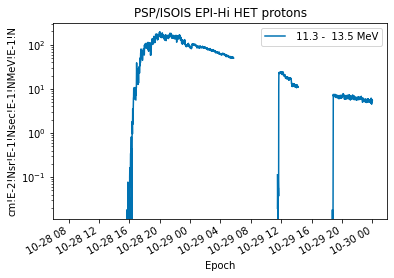

In [ ]:
df.A_H_Flux_3.plot(logy=True, ylabel=meta['H_FLUX_UNITS'], label=meta['H_ENERGY_LABL'][3][0], 
               title='PSP/ISOIS EPI-Hi HET protons')
plt.legend()

---
### 1. Example with different energy channels for ISOIS/EPIHI electrons and protons <a class="anchor" id="PSP_example_1"></a>

In [ ]:
from seppy.loader.psp import psp_isois_load
from seppy.util import jupyterhub_data_path
import warnings

# omit Pandas' PerformanceWarning
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [ ]:
dataset = "PSP_ISOIS-EPIHI_L2-HET-RATES60"
startdate = "2021/10/9"
enddate = "2021/10/10"
path = None
resample = "10min"
df_epihi, meta_epihi = psp_isois_load(dataset=dataset, startdate=startdate, enddate=enddate,
                          path=path, resample=resample)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

psp_isois-epihi_l2-het-rates60_20211009_v13.cdf:   0%|          | 0.00/2.50M [00:00<?, ?B/s]

Get info on flux units (note that electrons are count rates!):

In [ ]:
print(meta_epihi['H_FLUX_UNITS'])
print(meta_epihi['Electrons_Rate_UNITS'])

cm!E-2!Nsr!E-1!Nsec!E-1!NMeV!E-1!N
counts s!E-1!N


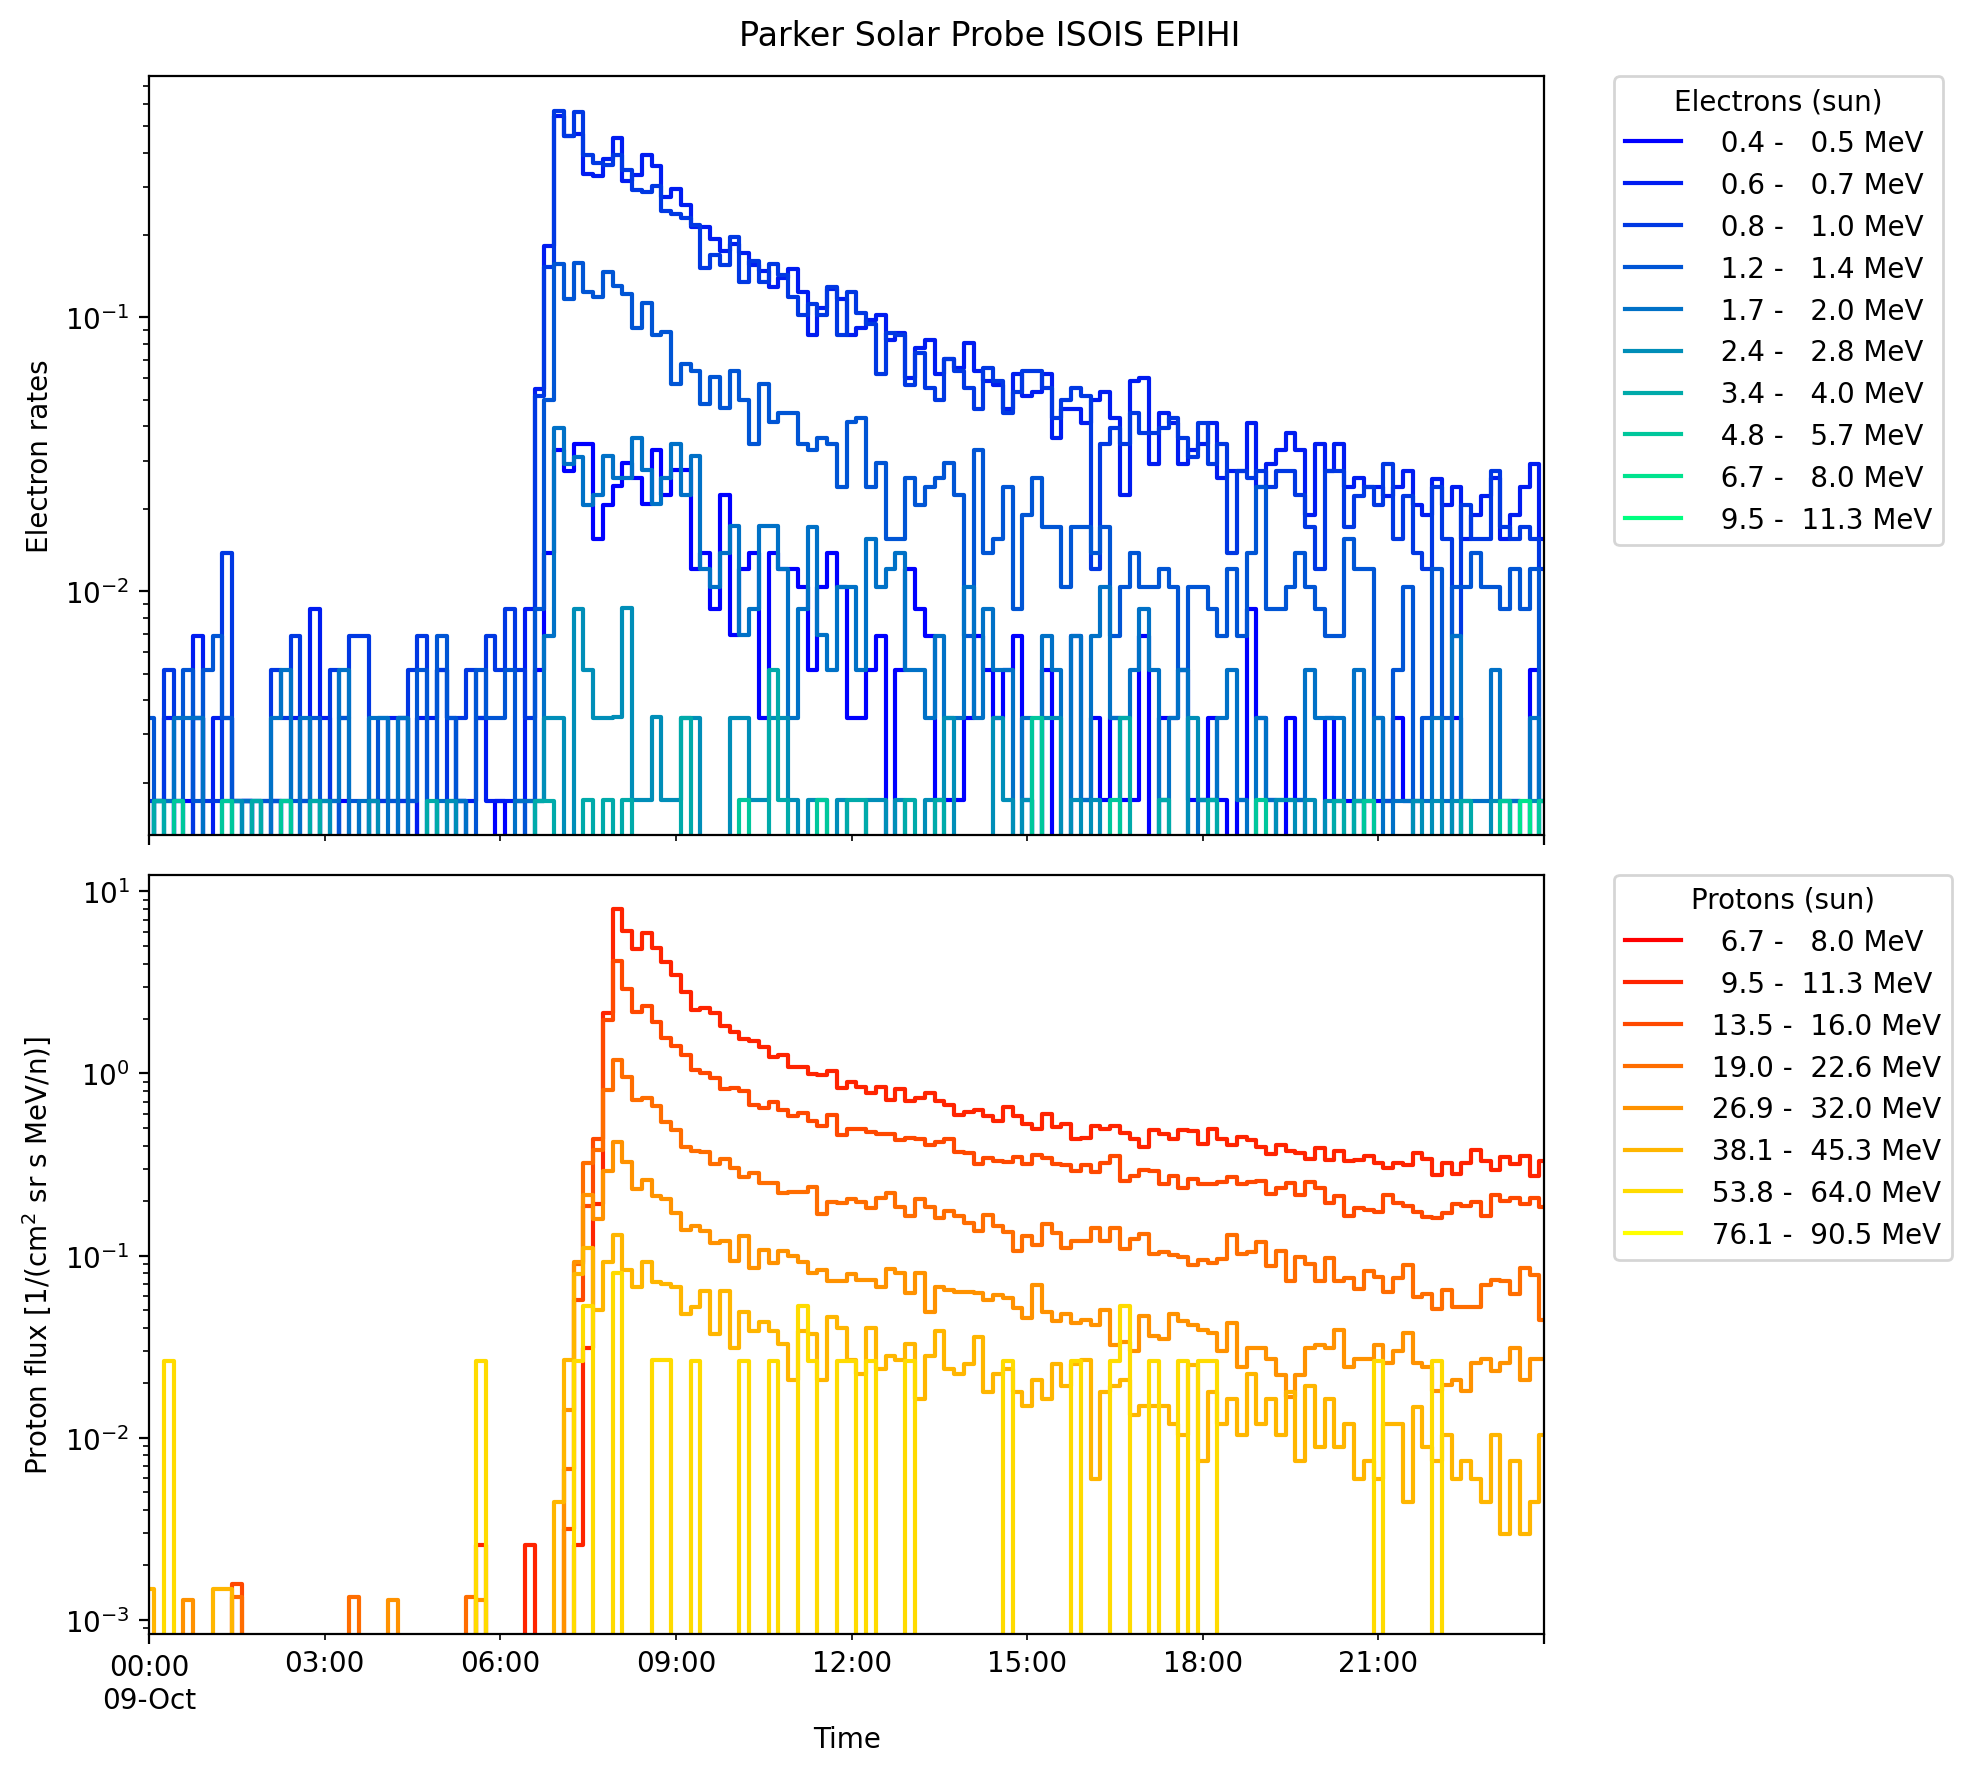

In [ ]:
fig, axs = plt.subplots(2, sharex=True, figsize=(10, 9), dpi=200)

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,9)), i.e. in 9 parts
axs[0].set_prop_cycle('color', plt.cm.winter(np.linspace(0, 1, 10)))
# plot selection of ept electron channels
for channel in range(0, len(df_epihi.filter(like='A_Electrons_Rate_').keys()), 2):
    df_epihi[f'A_Electrons_Rate_{channel}'].resample(resample).mean().plot(
      ax = axs[0], logy=True, drawstyle="steps-mid", label=meta_epihi['Electrons_ENERGY_LABL'][channel][0])

# Make list of gradually changing colors. Use a maplotlib 
axs[1].set_prop_cycle('color', plt.cm.autumn(np.linspace(0, 1, 8)))
# plot selection of ept ion channels
for channel in range(0, len(df_epihi.filter(like='A_H_Flux_').keys()), 2):
    df_epihi[f'A_H_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[1], logy=True, drawstyle="steps-mid", label=meta_epihi['H_ENERGY_LABL'][channel][0])

axs[0].set_ylabel("Electron rates")
axs[1].set_ylabel("Proton flux [1/(cm$^2$ sr s MeV/n)]")
axs[1].set_xlabel("Time")
axs[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=f'Electrons (sun)')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=f'Protons (sun)')
fig.suptitle('Parker Solar Probe ISOIS EPIHI')
plt.subplots_adjust(hspace=0)
plt.tight_layout()

---
# SOHO <a class="anchor" id="soho-loader"></a>

- GitHub: https://github.com/serpentine-h2020/SEPpy

Python data loader for SOHO particle instruments. At the moment provides released data obtained by SunPy through CDF files from CDAWeb for the following datasets:
 
-   ``'SOHO_COSTEP-EPHIN_L2-1MIN'``: SOHO COSTEP-EPHIN Level2 intensity 1 minute data ([Info](https://www.ieap.uni-kiel.de/et/ag-heber/costep/data.php)) [1]
-   ``'SOHO_COSTEP-EPHIN_L3I-1MIN'``: SOHO COSTEP-EPHIN Level3 intensity 1 minute data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#SOHO_COSTEP-EPHIN_L3I-1MIN))
-   ``'SOHO_ERNE-LED_L2-1MIN'``: SOHO ERNE-LED Level2 1 minute data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#SOHO_ERNE-LED_L2-1MIN))
-   ``'SOHO_ERNE-HED_L2-1MIN'``: SOHO ERNE-HED Level2 1 minute data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#SOHO_ERNE-HED_L2-1MIN))

[1] SOHO COSTEP-EPHIN Level2 intensity 1 minute data is directly obtained through ASCII files from the [server of the instrument team](http://ulysses.physik.uni-kiel.de/costep/level2/), not via SunPy/CDAWeb.

#### Imports

In [ ]:
from seppy.loader.soho import soho_load
import datetime as dt

#### Define options
-  ``dataset``: ``'SOHO_COSTEP-EPHIN_L2-1MIN'``, ``'SOHO_COSTEP-EPHIN_L3I-1MIN'``, ``'SOHO_ERNE-LED_L2-1MIN'``, or ``'SOHO_ERNE-HED_L2-1MIN'``. See above for explanation.
-  ``startdate``, ``enddate``: datetime object or "standard" datetime string
-  ``path``: String, optional. Local path for storing downloaded data, e.g. ``path='data/soho/'``. By default ``None``. Default setting saves data according to [sunpy's Fido standards](https://docs.sunpy.org/en/stable/guide/acquiring_data/fido.html#downloading-data).
-  ``resample``: Pandas frequency (e.g., ``'1min'`` or ``'1h'``), or ``None``, optional. Frequency to which the original data is resamepled. By default ``None``.
-  ``pos_timestamp``: String, optional. Change the position of the timestamp: ``'center'`` or ``'start'`` of the accumulation interval, or ``'original'`` to do nothing. By default ``center``.
-  ``max_conn``: Integer, optional. The number of parallel download slots used by ``Fido.fetch``, by default ``5``.

In [ ]:
dataset="SOHO_ERNE-HED_L2-1MIN"
startdate=dt.datetime(2021, 10, 28)
enddate="2021/10/30"
path=None
resample="1min"
pos_timestamp='center'

#### Load data

In [ ]:
df, meta = soho_load(dataset=dataset, startdate=startdate, enddate=enddate,
                     path=path, resample=resample, pos_timestamp=pos_timestamp)

In [ ]:
df

AH_0      AH_1      AH_2      AH_3      AH_4  \
Epoch                                                                   
2021-10-28 00:00:30  0.000198  0.000000  0.000000  0.000000  0.000000   
2021-10-28 00:01:30  0.000000  0.000000  0.000139  0.000000  0.000000   
2021-10-28 00:02:30  0.000000  0.000000  0.000000  0.000000  0.000089   
2021-10-28 00:03:30  0.000000  0.000145  0.000127  0.000000  0.000000   
2021-10-28 00:04:30  0.000000  0.000000  0.000000  0.000109  0.000084   
...                       ...       ...       ...       ...       ...   
2021-10-29 23:55:30  0.003010  0.003030  0.001800  0.000956  0.000352   
2021-10-29 23:56:30  0.003720  0.002780  0.001170  0.000382  0.001250   
2021-10-29 23:57:30  0.003250  0.002440  0.001610  0.001320  0.000621   
2021-10-29 23:58:30  0.003420  0.003140  0.001060  0.001490  0.001130   
2021-10-29 23:59:30  0.003550  0.002060  0.003170  0.000665  0.000351   

                         AH_5      AH_6      AH_7      AH_8      AH_9  ...  \
Epoch                                                                  ...   
2021-10-28 00:00:30  0.000000  0.000000  0.000048  0.000113  0.000000  ...   
2021-10-28 00:01:30  0.000106  0.000057  0.000000  0.000101  0.000043  ...   
2021-10-28 00:02:30  0.000102  0.000055  0.000000  0.000077  0.000041  ...   
2021-10-28 00:03:30  0.000000  0.000104  0.000000  0.000072  0.000000  ...   
2021-10-28 00:04:30  0.000000  0.000000  0.000037  0.000032  0.000039  ...   
...                       ...       ...       ...       ...       ...  ...   
2021-10-29 23:55:30  0.000343  0.000363  0.000081  0.000101  0.000109  ...   
2021-10-29 23:56:30  0.000521  0.000282  0.000101  0.000250  0.000000  ...   
2021-10-29 23:57:30  0.000581  0.000133  0.000155  0.000064  0.000000  ...   
2021-10-29 23:58:30  0.000387  0.000210  0.000188  0.000150  0.000052  ...   
2021-10-29 23:59:30  0.000342  0.000072  0.000096  0.000064  0.000108  ...   

                      PHC_1   PHC_2   PHC_3   PHC_4   PHC_5   PHC_6  PHC_7  \
Epoch                                                                        
2021-10-28 00:00:30     0.0     0.0     1.0     2.0     2.0     8.0   22.0   
2021-10-28 00:01:30     0.0     1.0     1.0     0.0     2.0     8.0   28.0   
2021-10-28 00:02:30     1.0     1.0     1.0     3.0     0.0     5.0   18.0   
2021-10-28 00:03:30     0.0     1.0     1.0     4.0     0.0     7.0   36.0   
2021-10-28 00:04:30     1.0     0.0     0.0     3.0     1.0     7.0   31.0   
...                     ...     ...     ...     ...     ...     ...    ...   
2021-10-29 23:55:30  3848.0  2101.0  1656.0  1525.0  1400.0  1172.0  336.0   
2021-10-29 23:56:30  3626.0  2157.0  1640.0  1575.0  1398.0  1187.0  357.0   
2021-10-29 23:57:30  3731.0  2188.0  1703.0  1578.0  1318.0  1243.0  356.0   
2021-10-29 23:58:30  3785.0  2129.0  1739.0  1517.0  1371.0  1196.0  348.0   
2021-10-29 23:59:30  3868.0  2178.0  1734.0  1565.0  1419.0  1190.0  329.0   

                     PHC_8  PHC_9      est  
Epoch                                       
2021-10-28 00:00:30    5.0    0.0  16512.0  
2021-10-28 00:01:30    6.0    1.0  16512.0  
2021-10-28 00:02:30   13.0    2.0  16512.0  
2021-10-28 00:03:30    8.0    3.0  16512.0  
2021-10-28 00:04:30   11.0    4.0  16512.0  
...                    ...    ...      ...  
2021-10-29 23:55:30   59.0    7.0  16512.0  
2021-10-29 23:56:30   60.0    6.0  16512.0  
2021-10-29 23:57:30   58.0    5.0  16512.0  
2021-10-29 23:58:30   61.0    5.0  16512.0  
2021-10-29 23:59:30   67.0    4.0  16512.0  

[2880 rows x 41 columns]

In [ ]:
meta

{'He_E_label': array(['13  - 16  MeV/n', '16  - 20  MeV/n', '20  - 25  MeV/n',
        '25  - 32  MeV/n', '32  - 40  MeV/n', '40  - 50  MeV/n',
        '50  - 64  MeV/n', '64  - 80  MeV/n', '80  - 100 MeV/n',
        '100 - 130 MeV/n'], dtype='<U15'),
 'He_energy': array([ 14.5,  18. ,  22.5,  28.5,  36. ,  45. ,  57. ,  72. ,  90. ,
        115. ], dtype=float32),
 'He_energy_delta': array([ 1.5,  2. ,  2.5,  3.5,  4. ,  5. ,  7. ,  8. , 10. , 15. ],
       dtype=float32),
 'AH_LABL': 'He-4 intensity',
 'AH_UNITS': '(cm^2 s sr MeV/n)^-1',
 'AH_FILLVAL': -1e+31,
 'P_E_label': array(['13  - 16  MeV', '16  - 20  MeV', '20  - 25  MeV', '25  - 32  MeV',
        '32  - 40  MeV', '40  - 50  MeV', '50  - 64  MeV', '64  - 80  MeV',
        '80  - 100 MeV', '100 - 130 MeV'], dtype='<U13'),
 'P_energy': array([ 14.5,  18. ,  22.5,  28.5,  36. ,  45. ,  57. ,  72. ,  90. ,
        115. ], dtype=float32),
 'P_energy_delta': array([ 1.5,  2. ,  2.5,  3.5,  4. ,  5. ,  7. ,  8. , 10. , 15. ],
      

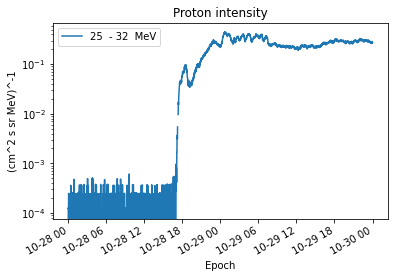

In [ ]:
df.PH_3.plot(logy=True, ylabel=meta['PH_UNITS'], label=meta['P_E_label'][3], title=meta['PH_LABL'])
plt.legend()

---
# STEREO <a class="anchor" id="stereo-loader"></a>

- GitHub: https://github.com/serpentine-h2020/SEPpy

Python data loader for some STEREO instruments (i.e., magnetic field and charged particles). At the moment provides released data obtained by SunPy through CDF files from CDAWeb for the following datasets:

- ``'HET'``: STEREO IMPACT/HET Level 1 Data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_HET)) 
- ``'LET'``: STEREO IMPACT/LET Level 1 Data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_LET))
- ``'MAG'``: STEREO IMPACT/MAG Magnetic Field Vectors (RTN or SC) ([Info RTN](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_MAG_RTN), [Info SC](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_MAG_SC))
- ``'MAGB'``: STEREO IMPACT/MAG Burst Mode (~0.03 sec) Magnetic Field Vectors (RTN or SC) ([Info RTN](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_MAGB_RTN), [Info SC](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_MAGB_SC))
- ``'SEPT'``: STEREO IMPACT/SEPT Level 2 Data ([Info 1](http://www2.physik.uni-kiel.de/STEREO/data/sept/level2/about.txt), [Info 2](http://www2.physik.uni-kiel.de/STEREO/data/sept/level2/SEPT_L2_description.pdf)) [1]

[1] STEREO IMPACT/SEPT Level 2 data is directly obtained through ASCII files from the [server of the instrument team](http://www2.physik.uni-kiel.de/STEREO/data/sept/level2/), not via SunPy/CDAWeb.

#### Imports

In [ ]:
from seppy.loader.stereo import stereo_load
import datetime as dt

#### Define options

-  ``instrument``: ``'HET'``, ``'LET'``, ``'MAG'``, ``'MAGB'``, or ``'SEPT'``. See above for explanation.
-  ``startdate``, ``enddate``: datetime object or "standard" datetime string
-  ``spacecraft``: String, optional. Name of STEREO spacecraft: ``'ahead'`` or ``'behind'``, by default ``'ahead'``.
-  ``mag_coord``: String, optional. Coordinate system for MAG: ``'RTN'`` or ``'SC'``, by default ``'RTN'``.
-  ``sept_species``: String, optional. Particle species for SEPT: ``'e'`` for electrons or ``'p'`` for protons (resp. ions), by default ``'e'``.
-  ``sept_viewing``: String, optional. Viewing direction for SEPT: ``'sun'``, ``'asun'``, ``'north'``, or ``'south'``, by default ``'sun'``.
-  ``path``: String, optional. Local path for storing downloaded data, e.g. ``path='data/stereo/'``. By default ``None``. Default setting saves data according to [sunpy's Fido standards](https://docs.sunpy.org/en/stable/guide/acquiring_data/fido.html#downloading-data).
-  ``resample``: Pandas frequency (e.g., ``'1min'`` or ``'1h'``), or ``None``, optional. Frequency to which the original data is resamepled. By default ``None``.
-  ``pos_timestamp``: String, optional. Change the position of the timestamp: ``'center'`` or ``'start'`` of the accumulation interval, or ``'original'`` to do nothing. By default ``center``.
-  ``max_conn``: Integer, optional. The number of parallel download slots used by ``Fido.fetch``, by default ``5``.

In [ ]:
instrument = "HET"
startdate = dt.datetime(2021, 10, 28)
enddate = "2021/10/30"
path = None
resample = "1min"
pos_timestamp = 'center'

#### Load data

In [ ]:
df, meta = stereo_load(instrument=instrument, startdate=startdate, enddate=enddate, spacecraft='ahead',
                       path=path, resample=resample, pos_timestamp=pos_timestamp)

In [ ]:
df

Electron_Flux_0  Electron_Flux_1  Electron_Flux_2  \
Epoch                                                                    
2021-10-28 00:00:30         0.118114         0.000000         0.000000   
2021-10-28 00:01:30         0.000000         0.019692         0.022974   
2021-10-28 00:02:30         0.000000         0.059097         0.000000   
2021-10-28 00:03:30         0.078742         0.000000         0.000000   
2021-10-28 00:04:30         0.000000         0.019686         0.000000   
...                              ...              ...              ...   
2021-10-29 23:55:30         8.474209         4.318587         1.235822   
2021-10-29 23:56:30         7.374192         3.544501         1.354651   
2021-10-29 23:57:30         8.229761         4.461182         1.212056   
2021-10-29 23:58:30         7.374192         3.809320         1.853733   
2021-10-29 23:59:30         6.681588         4.461182         0.855569   

                     Electron_Sigma_0  Electron_Sigma_1  Electron_Sigma_2  \
Epoch                                                                       
2021-10-28 00:00:30          0.068193          0.000000          0.000000   
2021-10-28 00:01:30          0.000000          0.019692          0.022974   
2021-10-28 00:02:30          0.000000          0.034120          0.000000   
2021-10-28 00:03:30          0.055679          0.000000          0.000000   
2021-10-28 00:04:30          0.000000          0.019686          0.000000   
...                               ...               ...               ...   
2021-10-29 23:55:30          0.587581          0.296602          0.171378   
2021-10-29 23:56:30          0.548119          0.268708          0.179428   
2021-10-29 23:57:30          0.579044          0.301459          0.169722   
2021-10-29 23:58:30          0.548119          0.278565          0.209894   
2021-10-29 23:59:30          0.521744          0.301459          0.142595   

                     Proton_Flux_0  Proton_Flux_1  Proton_Flux_2  \
Epoch                                                              
2021-10-28 00:00:30       0.000000       0.000000       0.000000   
2021-10-28 00:01:30       0.000000       0.000000       0.000000   
2021-10-28 00:02:30       0.000000       0.000000       0.000000   
2021-10-28 00:03:30       0.000000       0.000000       0.000000   
2021-10-28 00:04:30       0.000000       0.000000       0.000000   
...                            ...            ...            ...   
2021-10-29 23:55:30       5.122158       4.560346       3.294433   
2021-10-29 23:56:30       4.897008       4.425822       3.663213   
2021-10-29 23:57:30       5.291020       4.345108       3.282140   
2021-10-29 23:58:30       5.403595       4.560346       3.712384   
2021-10-29 23:59:30       5.384832       4.331656       3.306726   

                     Proton_Flux_3  ...  Proton_Sigma_1  Proton_Sigma_2  \
Epoch                               ...                                   
2021-10-28 00:00:30       0.000000  ...        0.000000        0.000000   
2021-10-28 00:01:30       0.000000  ...        0.000000        0.000000   
2021-10-28 00:02:30       0.000000  ...        0.000000        0.000000   
2021-10-28 00:03:30       0.000000  ...        0.000000        0.000000   
2021-10-28 00:04:30       0.000000  ...        0.000000        0.000000   
...                            ...  ...             ...             ...   
2021-10-29 23:55:30       2.073254  ...        0.247684        0.201240   
2021-10-29 23:56:30       2.354692  ...        0.244003        0.212204   
2021-10-29 23:57:30       1.932536  ...        0.241768        0.200864   
2021-10-29 23:58:30       2.148304  ...        0.247684        0.213624   
2021-10-29 23:59:30       1.904392  ...        0.241394        0.201615   

                     Proton_Sigma_3  Proton_Sigma_4  Proton_Sigma_5  \
Epoch                                                                 
2021-10-28 00:00:30        0.000000        0.000000  

In [ ]:
meta

{'Electron_Bins_Text': array([['0.7 - 1.4 MeV'],
        ['1.4 - 2.8 MeV'],
        ['2.8 - 4.0 MeV']], dtype='<U13'),
 'Electron_Flux_UNITS': '#/(cm2-steradian-second-MeV/nucleon) ',
 'Electron_Flux_FILLVAL': -1e+31,
 'Proton_Bins_Text': array([['13.6 - 15.1 MeV '],
        ['15.0 - 17.1 MeV '],
        ['17.0 - 19.3 MeV '],
        ['20.8 - 23.8 MeV '],
        ['23.8 - 26.4 MeV '],
        ['26.3 - 29.7 MeV '],
        ['29.6 - 33. 4 MeV'],
        ['33.4 - 35.8 MeV '],
        ['35.6 - 40.5 MeV '],
        ['40 - 60 MeV     '],
        ['60 - 100 MeV    ']], dtype='<U16'),
 'Proton_Flux_UNITS': '#/(cm2-steradian-second-MeV/nucleon) ',
 'Proton_Flux_FILLVAL': -1e+31,
 'channels_dict_df_e':       ch_strings  lower_E  upper_E   DE    mean_E
 0  0.7 - 1.4 MeV      0.7      1.4  0.7  0.989949
 1  1.4 - 2.8 MeV      1.4      2.8  1.4  1.979899
 2  2.8 - 4.0 MeV      2.8      4.0  1.2  3.346640,
 'channels_dict_df_p':           ch_strings  lower_E  upper_E    DE     mean_E
 0   13.6 - 15.

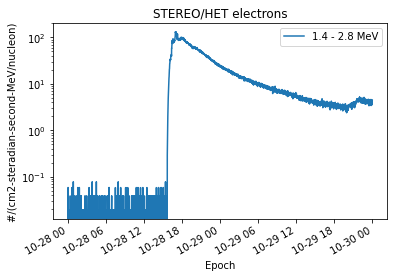

In [ ]:
df.Electron_Flux_1.plot(logy=True, ylabel=meta['Electron_Flux_UNITS'], label=meta['Electron_Bins_Text'][1][0], 
                        title='STEREO/HET electrons')
plt.legend()

---
# Wind/3DP <a class="anchor" id="wind-3dp-loader"></a>

- GitHub: https://github.com/serpentine-h2020/SEPpy

Python data loader for Wind/3DP instrument. At the moment provides released data obtained by SunPy through CDF files from CDAWeb for the following datasets:

- `'WI_SFSP_3DP'`: Electron omnidirectional fluxes 27 keV - 520 keV, often at 24 sec ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesW.html#WI_SFSP_3DP), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/wi_sfsp_3dp_00000000_v01.skt))
- `'WI_SFPD_3DP'`: Electron energy-angle distributions 27 keV to 520 keV, often at 24 sec ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesW.html#WI_SFPD_3DP), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/wi_sfpd_3dp_00000000_v01.skt))
- `'WI_SOSP_3DP'`: Proton omnidirectional fluxes 70 keV - 6.8 MeV, often at 24 sec ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesW.html#WI_SOSP_3DP), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/wi_sosp_3dp_00000000_v01.skt))
- `'WI_SOPD_3DP'`: Proton energy-angle distributions 70 keV - 6.8 MeV, often at 24 sec ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesW.html#WI_SOPD_3DP), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/wi_sopd_3dp_00000000_v01.skt))

Note that for Wind/3DP, energies are usually provided in eV (and not keV or MeV)!

#### Imports

In [ ]:
from seppy.loader.wind import wind3dp_load
import datetime as dt

#### Define options


-  ``dataset``: ``'WI_SFSP_3DP'``, ``'WI_SFPD_3DP'``, ``'WI_SOSP_3DP'``, or ``'WI_SOPD_3DP'``. See above for explanation.
-  ``startdate``, ``enddate``: datetime object or "standard" datetime string
-  ``resample``: Pandas frequency (e.g., ``'1min'`` or ``'1h'``), or ``None``, optional. Frequency to which the original data (~24 seconds) is resamepled. By default ``'1min'``.
-  ``multi_index``: ``True``, or ``False`` (boolean), optional. Provide output for pitch-angle resolved data as Pandas Dataframe with multiindex. By default ``True``.
-  ``path``: String, optional. Local path for storing downloaded data, e.g. ``path='data/wind/3dp/'``. By default `None`. Default setting saves data according to [sunpy's Fido standards](https://docs.sunpy.org/en/stable/guide/acquiring_data/fido.html#downloading-data>).
-  ``threshold``: Integer or float, optional. Replace all FLUX values in ``df`` above ``threshold`` with ``np.nan``, by default ``None``.

In [ ]:
dataset = "WI_SFSP_3DP"
startdate = dt.datetime(2021, 10, 28)
enddate = "2021/10/30"
multi_index = False
path = None
resample = "1min"

#### Load data

In [ ]:
df, meta = wind3dp_load(dataset=dataset, startdate=startdate, enddate=enddate,
                        multi_index=multi_index, path=path, resample=resample)

In [ ]:
df

TIME    FLUX_0    FLUX_1    FLUX_2    FLUX_3  \
Time                                                                        
2021-10-28 00:00:30  1.635379e+09  0.051309  0.000223  0.000024  0.000012   
2021-10-28 00:01:30  1.635379e+09       NaN       NaN       NaN       NaN   
2021-10-28 00:02:30  1.635379e+09       NaN       NaN       NaN       NaN   
2021-10-28 00:03:30  1.635379e+09       NaN       NaN       NaN       NaN   
2021-10-28 00:04:30  1.635379e+09       NaN       NaN       NaN       NaN   
...                           ...       ...       ...       ...       ...   
2021-10-29 23:55:30  1.635552e+09  0.077283  0.022559  0.008904  0.003542   
2021-10-29 23:56:30  1.635552e+09  0.077087  0.022568  0.008863  0.003578   
2021-10-29 23:57:30  1.635552e+09  0.077987  0.022398  0.008843  0.003579   
2021-10-29 23:58:30  1.635552e+09  0.078650  0.022346  0.008986  0.003576   
2021-10-29 23:59:30  1.635552e+09  0.077463  0.022588  0.008952  0.003559   

                       FLUX_4    FLUX_5    FLUX_6      ENERGY_0      ENERGY_1  \
Time                                                                            
2021-10-28 00:00:30  0.000007  0.000003  0.000001  26994.957031  40138.667969   
2021-10-28 00:01:30       NaN       NaN       NaN           NaN           NaN   
2021-10-28 00:02:30       NaN       NaN       NaN           NaN           NaN   
2021-10-28 00:03:30       NaN       NaN       NaN           NaN           NaN   
2021-10-28 00:04:30       NaN       NaN       NaN           NaN           NaN   
...                       ...       ...       ...           ...           ...   
2021-10-29 23:55:30  0.001546  0.000674  0.000551  26994.957031  40138.667969   
2021-10-29 23:56:30  0.001585  0.000687  0.000549  26994.957031  40138.667969   
2021-10-29 23:57:30  0.001587  0.000683  0.000541  26994.957031  40138.667969   
2021-10-29 23:58:30  0.001601  0.000692  0.000557  26994.957031  40138.667969   
2021-10-29 23:59:30  0.001611  0.000684  0.000558  26994.957031  40138.667969   

                         ENERGY_2       ENERGY_3       ENERGY_4     ENERGY_5  \
Time                                                                           
2021-10-28 00:00:30  66172.257812  108440.953125  181782.484375  309508.9375   
2021-10-28 00:01:30           NaN            NaN            NaN          NaN   
2021-10-28 00:02:30           NaN            NaN            NaN          NaN   
2021-10-28 00:03:30           NaN            NaN            NaN          NaN   
2021-10-28 00:04:30           NaN            NaN            NaN          NaN   
...                           ...            ...            ...          ...   
2021-10-29 23:55:30  66172.257812  108440.953125  181782.484375  309508.9375   
2021-10-29 23:56:30  66172.257812  108440.953125  181782.484375  309508.9375   
2021-10-29 23:57:30  66172.257812  108440.953125  181782.484375  309508.9375   
2021-10-29 23:58:30  66172.257812  108440.953125  181782.484375  309508.9375   
2021-10-29 23:59:30  66172.257812  108440.953125  181782.484375  309508.9375   

                         ENERGY_6  
Time                               
2021-10-28 00:00:30  516823.40625  
2021-10-28 00:01:30           NaN  
2021-10-28 00:02:30           NaN  
2021-10-28 00:03:30           NaN  
2021-10-28 00:04:30           NaN  
...                           ...  
2021-10-29 23:55:30  516823.40625  
2021-10-29 23:56:30  516823.40625  
2021-10-29 23:57:30  516823.40625  
2021-10-29 23:58:30  516823.40625  
2021-10-29 23:59:30  516823.40625  

[2880 rows x 15 columns]

In [ ]:
meta

{'channels_dict_df':                  mean_E             DE        lower_E        upper_E  \
 ENERGY_0   26994.957031    8098.487305   18896.468750   35093.445312   
 ENERGY_1   40138.664062   12041.599609   28097.064453   52180.265625   
 ENERGY_2   66172.257812   19851.677734   46320.578125   86023.937500   
 ENERGY_3  108440.960938   32532.289062   75908.671875  140973.250000   
 ENERGY_4  181782.484375   54534.746094  127247.734375  236317.234375   
 ENERGY_5  309509.000000   92852.703125  216656.296875  402361.687500   
 ENERGY_6  516823.437500  155047.031250  361776.406250  671870.500000   
 
                     Bins_Text  
 ENERGY_0     18.9 - 35.09 keV  
 ENERGY_1     28.1 - 52.18 keV  
 ENERGY_2    46.32 - 86.02 keV  
 ENERGY_3   75.91 - 140.97 keV  
 ENERGY_4  127.25 - 236.32 keV  
 ENERGY_5  216.66 - 402.36 keV  
 ENERGY_6  361.78 - 671.87 keV  ,
 'APPROX_ENERGY_LABELS': array([['EnergyCh1_Often~27000eV '],
        ['EnergyCh2_Often~40500eV '],
        ['EnergyCh3_Often~860

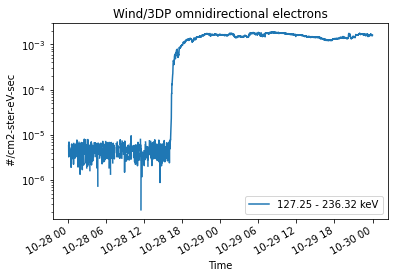

In [ ]:
df.FLUX_4.plot(logy=True, ylabel=meta['FLUX_UNITS'], label=meta['channels_dict_df']['Bins_Text'].values[4], 
               title='Wind/3DP omnidirectional electrons')
plt.legend()

---
# FAQ / Problems <a class="anchor" id="faq"></a>

- **Saving figures**

You can usually save a figure from the Notebook by right-clicking on it while holding down the ⇧ Shift key, then select "Save Image As..." (or similar).

- **I get some error about missing data, or that the data is broken, or something I don't understand.**

Most times such a problem originates in an incomplete download of the corresponding data file. The easiest approach to solve that problem is to delete the file and run the code again to re-download it. 
To do this, first check if a `path` has been provided. If `path` has *not* been defined (or as `None`), the standard `path` for SunPy downloads should have been used. You can obtain it by running the following code cell:


In [ ]:
import sunpy 
sunpy.config.get('downloads', 'download_dir')

'/home/gieseler/sunpy/data'

Open the corresponding directory in your file browser and look for the corresponding data file. Usually it's easiest to order the files by modification date, so that the latest modified file (which usually should be the culprit) comes first. Then delete the corresponding file(s), and run the code again.